In [9]:
from NN_train_parameters import *
from Train import train_model
from ODE_parameters import *
from Utilities import get_domain, nth_derivative, plot_function, make_report,  LossMSE, plot_results
from math import pi
from math import

$$ u_{xx} + 0.2u_x + u = -0.2 exp(-x/5) cos(x)$$

$$ u(0)=0, u(1)= sin(1)*exp(-0.2) $$

$$ func\_appr = x*sin(1)*exp(-0.2) + x*(1-x)*NN(x) \\ $$ 

$$ true\_solution = exp(-\frac{x}{5})*sin(x)$$

Here:

func_appr - a trial function satisfying boundary conditions

NN - Neural network output for input x

In [2]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1
number_of_points = 20

# in this case it is: u_xx + 0.2* u_x + u = -0.2 * exp(-x/5) * cos(x)
differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    + 0.2 * nth_derivative(function, variable, 1)
    + function
    + 0.2 * torch.exp(-variable / 5) * torch.cos(variable)
)

# representing approximation of function so that it satisfies the boundary conditions
# f(0) = 0  f(1) = 1
approximation_of_function = (
    lambda x, nn_model_value: x
    * torch.sin(torch.tensor([1.0]))
    * torch.exp(torch.tensor([-0.2]))
    + x * (1 - x) * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.exp(-x / 5) * torch.sin(x)

In [3]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 52.22it/s]

train Loss: 0.8638



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 141.83it/s]

val Loss: 2.5383
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.39it/s]

train Loss: 1.1224



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 139.27it/s]

val Loss: 1.8009
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.76it/s]

train Loss: 1.0184



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 147.76it/s]

val Loss: 4.7686
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.66it/s]

train Loss: 1.4293



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 143.74it/s]


val Loss: 4.0478
Epoch 4/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.42it/s]

train Loss: 1.1321



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 135.95it/s]

val Loss: 7.3110
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 47.79it/s]

train Loss: 1.9362



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 118.64it/s]

val Loss: 1.9569
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.76it/s]

train Loss: 0.5157



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 145.13it/s]

val Loss: 5.2567
Epoch 7/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.93it/s]

train Loss: 1.4994



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 143.24it/s]

val Loss: 0.7949
Epoch 8/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.91it/s]

train Loss: 0.5916



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 135.15it/s]

val Loss: 3.5912
Epoch 9/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.00it/s]

train Loss: 0.8382



100%|████████████████████████████████████████████████████████████▊                    | 15/20 [00:00<00:00, 146.45it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10082 characters

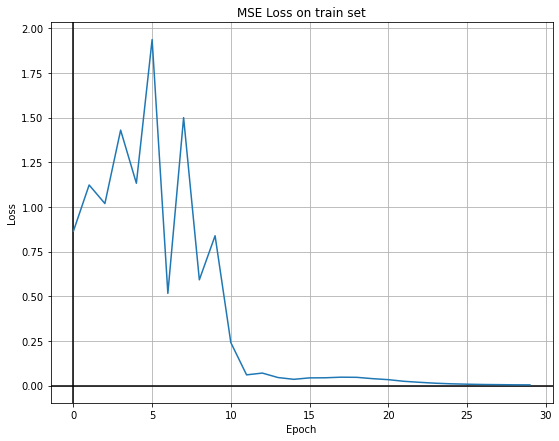

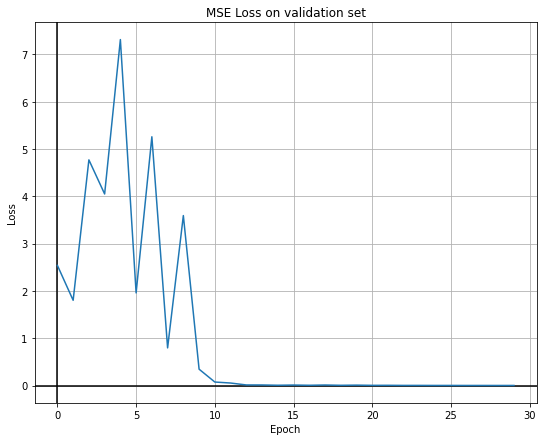

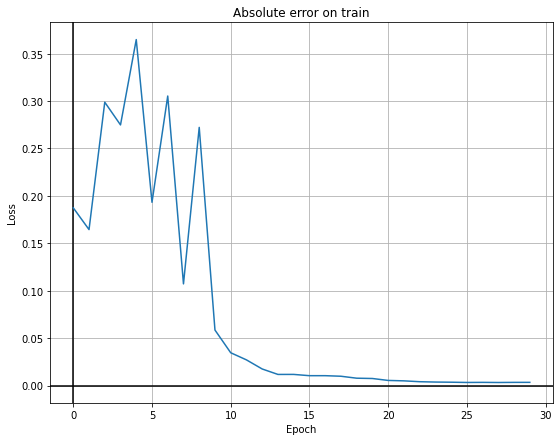

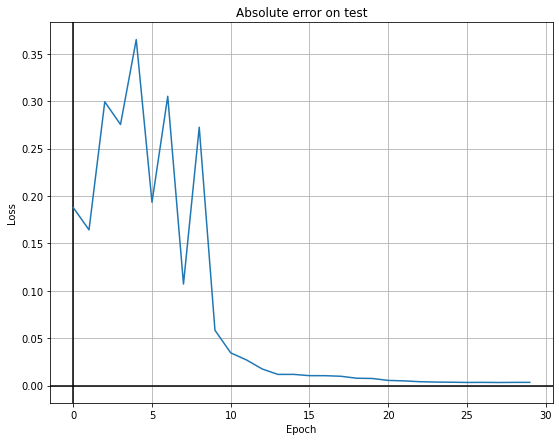

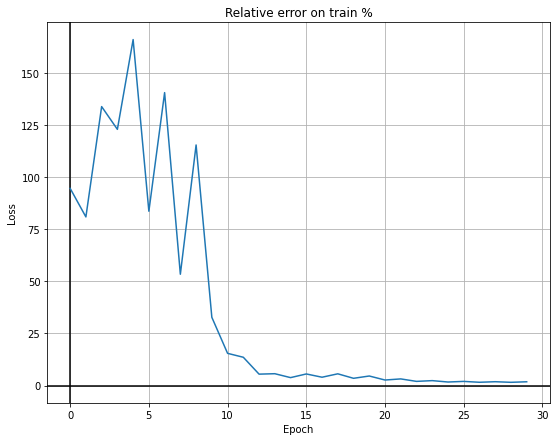

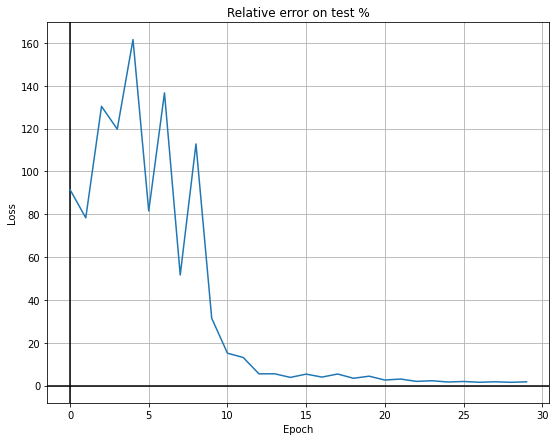

In [4]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.003323286771774292
Train relative error: 1.7918903827667236 %
Valid absolute error: 0.003323584794998169
Valid relative error: 1.7219347953796387 %


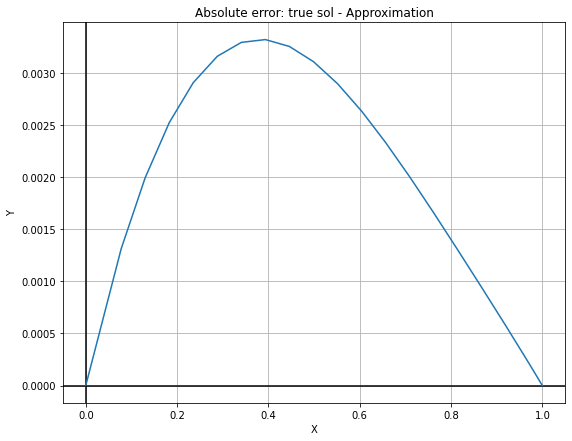

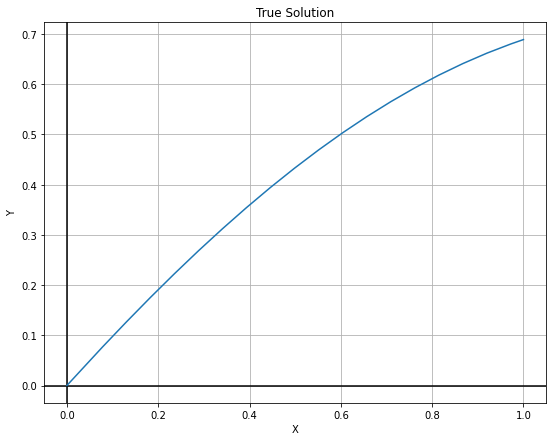

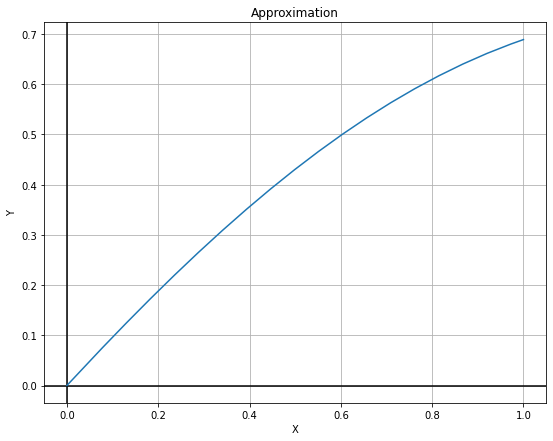

In [5]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$ u_{xx} + 0.2u_x + u = -0.2 exp(-x/5) cos(x)$$

$$ u(0)=0, u'(0)=1 $$ 

$$ func\_appr = x + x^2 * NN(x)$$

$$ x \in [0,2] $$
$$ true\_solution = exp(-\frac{x}{5})*sin(x)$$

In [6]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 2
number_of_points = 20

# in this case it is: u_xx + 0.2* u_x + u = -0.2 * exp(-x/5) * cos(x)
differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    + 0.2 * nth_derivative(function, variable, 1)
    + function
    + 0.2 * torch.exp(-variable / 5) * torch.cos(variable)
)

# representing approximation of function so that it satisfies the boundary conditions
# f(0) = 0  f(1) = 1
approximation_of_function = (
    lambda x, nn_model_value: x
    + x * x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.exp(-x / 5) * torch.sin(x)

In [7]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.16it/s]

train Loss: 0.1589



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 147.44it/s]

val Loss: 2.2884
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.76it/s]

train Loss: 1.8861



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 126.92it/s]

val Loss: 0.3010
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.69it/s]

train Loss: 0.1360



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 156.90it/s]

val Loss: 0.0318
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.52it/s]

train Loss: 0.0177



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 136.42it/s]

val Loss: 0.0043
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 52.32it/s]

train Loss: 0.0018



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 136.42it/s]

val Loss: 0.0039
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.61it/s]

train Loss: 0.0027



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 134.57it/s]

val Loss: 0.0049
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.47it/s]

train Loss: 0.0033



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.55it/s]


val Loss: 0.0053
Epoch 7/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.47it/s]

train Loss: 0.0054



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 134.59it/s]

val Loss: 0.0038
Epoch 8/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.36it/s]

train Loss: 0.0071



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 152.69it/s]

val Loss: 0.0027
Epoch 9/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 46.53it/s]

train Loss: 0.0056



 80%|████████████████████████████████                                                           | 0/20 [00:00<?, ?it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10082 characters

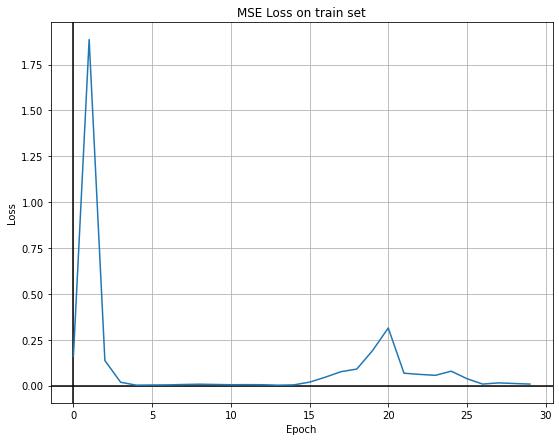

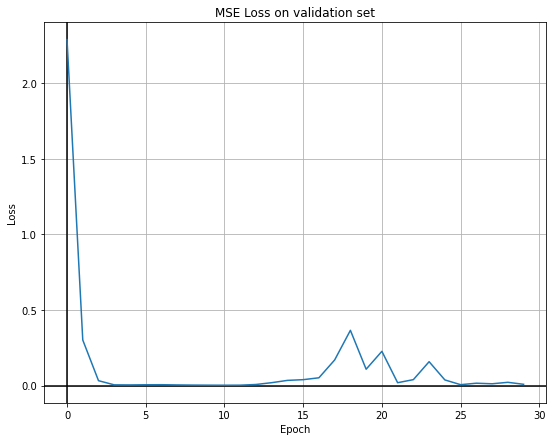

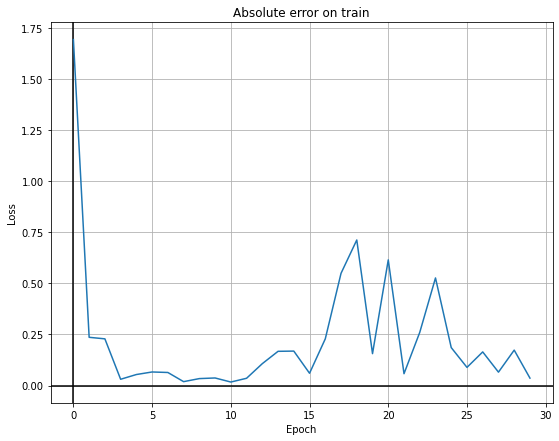

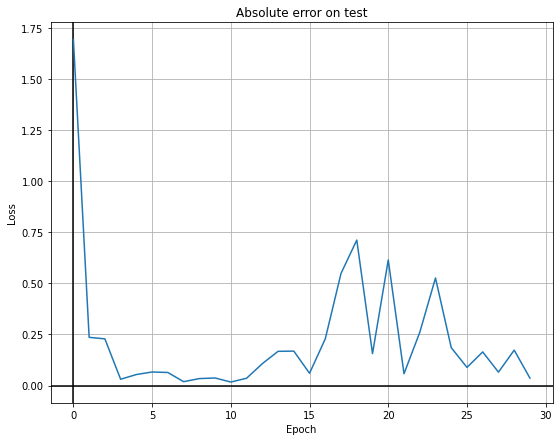

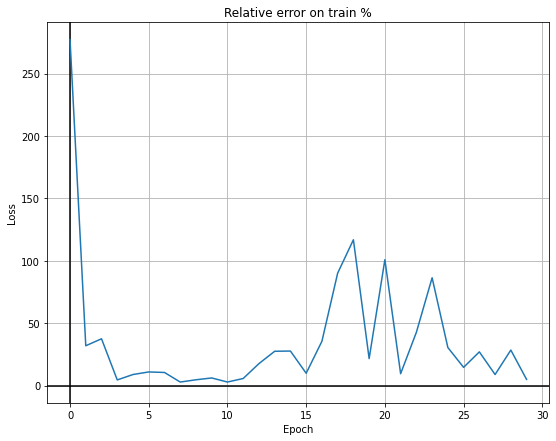

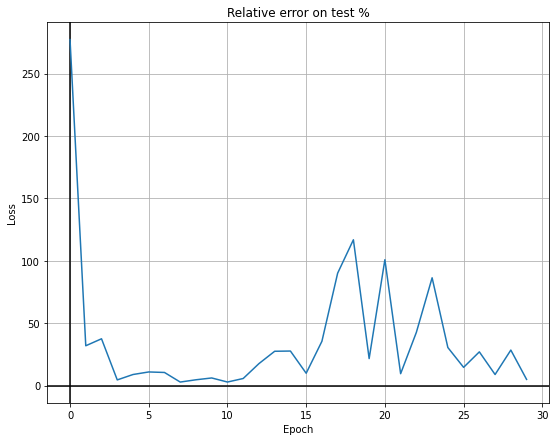

In [8]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.03612363338470459
Train relative error: 4.879683017730713 %
Valid absolute error: 0.03603994846343994
Valid relative error: 4.892246246337891 %


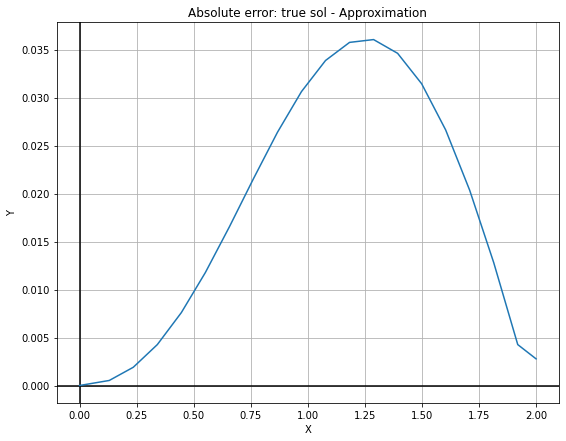

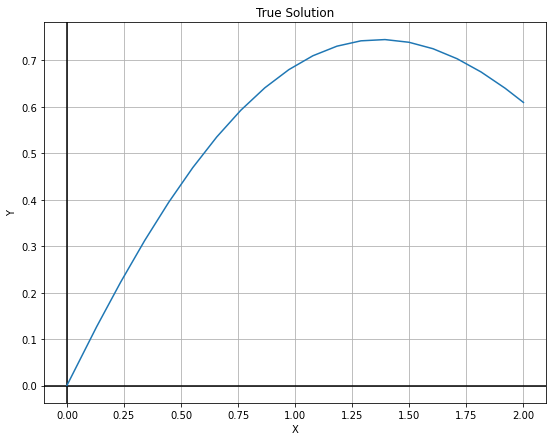

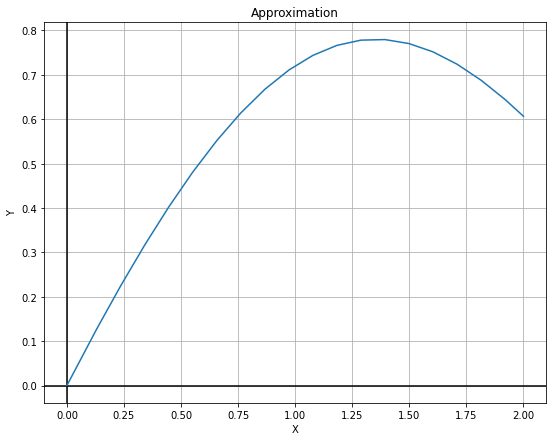

In [9]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$ x' + 0.2x = exp(-0.2x)cos(x)$$
$$ x(0) = 0, x \in [0.2] $$
$$ func\_appr = x * NN(x)$$
$$ true\_solution = exp(-\frac{x}{5})*sin(x) $$

In [10]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 2
number_of_points = 20

# in this case it is: u_xx + 0.2* u_x + u = -0.2 * exp(-x/5) * cos(x)
differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 1)
    + 0.2 * function
    -  torch.exp(-variable / 5) * torch.cos(variable)
)

# representing approximation of function so that it satisfies the boundary conditions
# f(0) = 0  f(1) = 1
approximation_of_function = (
    lambda x, nn_model_value:  x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.exp(-x / 5) * torch.sin(x)

In [11]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 85.33it/s]

train Loss: 0.3036



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 274.70it/s]

val Loss: 0.0215
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 82.26it/s]

train Loss: 0.0131



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 318.11it/s]

val Loss: 0.4749
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 81.14it/s]

train Loss: 0.1515



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 307.34it/s]

val Loss: 0.1701
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 81.49it/s]

train Loss: 0.1363



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 282.44it/s]

val Loss: 0.1989
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 83.68it/s]

train Loss: 0.0364



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 285.81it/s]

val Loss: 0.0603
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 81.19it/s]

train Loss: 0.0606



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 244.64it/s]

val Loss: 0.1270
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 86.53it/s]

train Loss: 0.0476



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 253.27it/s]

val Loss: 0.2829
Epoch 7/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 84.38it/s]

train Loss: 0.1221



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 287.28it/s]

val Loss: 0.2144
Epoch 8/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 80.84it/s]

train Loss: 0.1133



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 277.50it/s]

val Loss: 0.5676
Epoch 9/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 79.94it/s]

train Loss: 0.2506



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 323.46it/s]

val Loss: 0.1628
Epoch 10/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 83.47it/s]

train Loss: 0.0437



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 257.09it/s]

val Loss: 0.0293
Epoch 11/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 84.10it/s]

train Loss: 0.0206



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 288.53it/s]

val Loss: 0.0305
Epoch 12/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 82.71it/s]

train Loss: 0.0248



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 312.93it/s]

val L

limit_output extension: Maximum message size of 10000 exceeded with 10012 characters

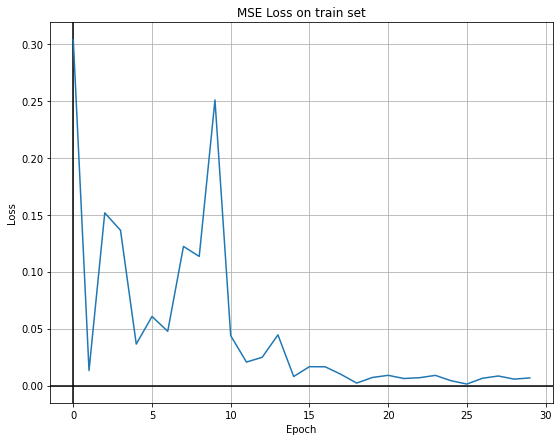

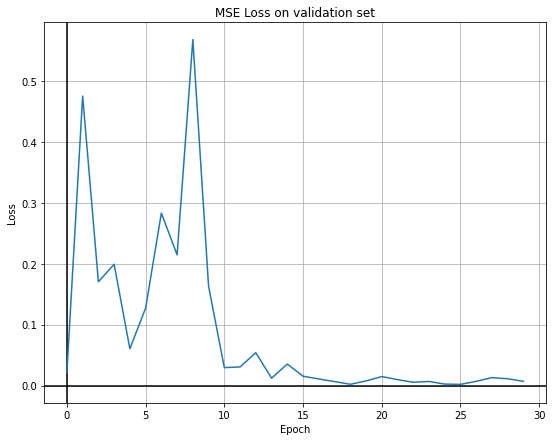

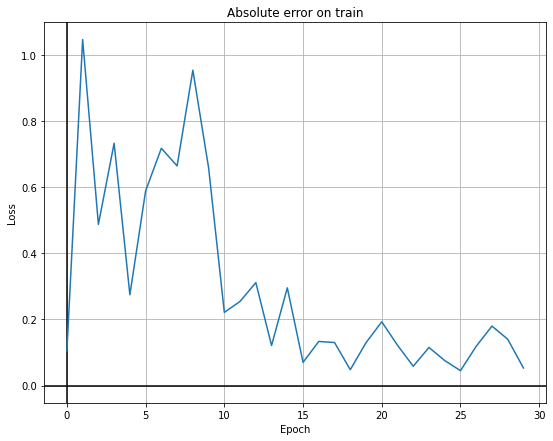

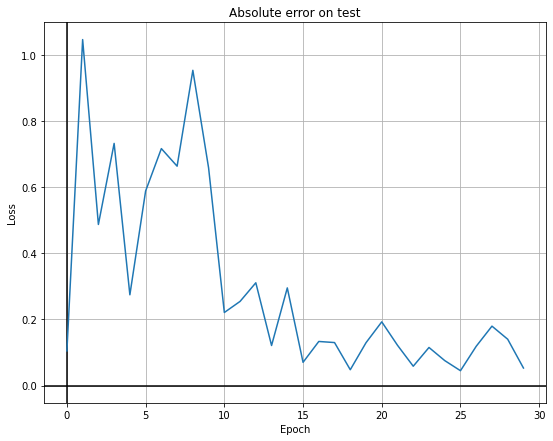

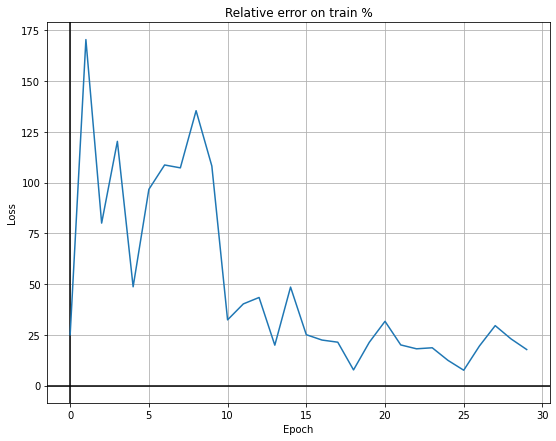

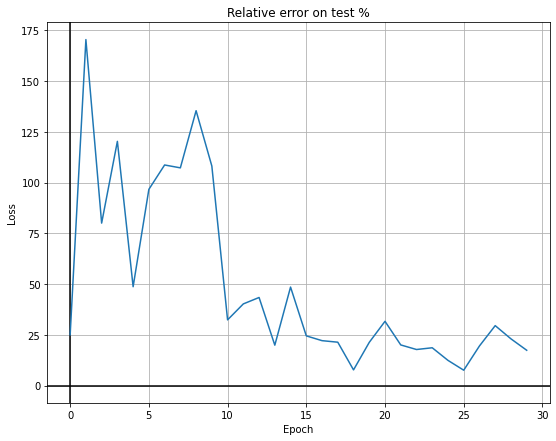

In [12]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.05301973223686218
Train relative error: 17.724529266357422 %
Valid absolute error: 0.05296650528907776
Valid relative error: 17.36903190612793 %


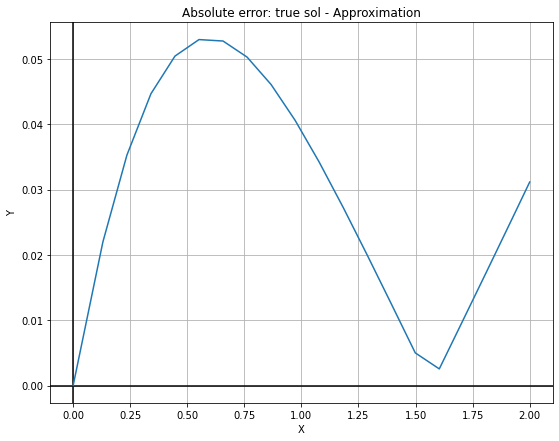

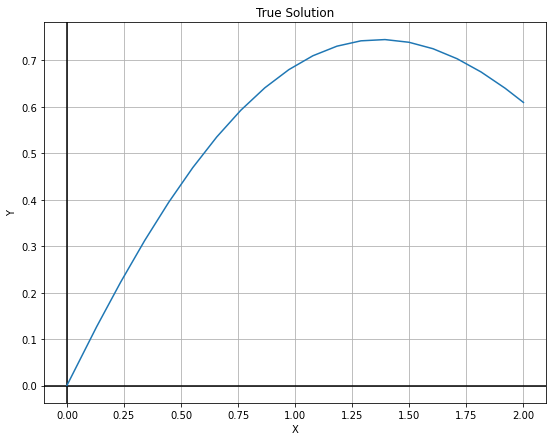

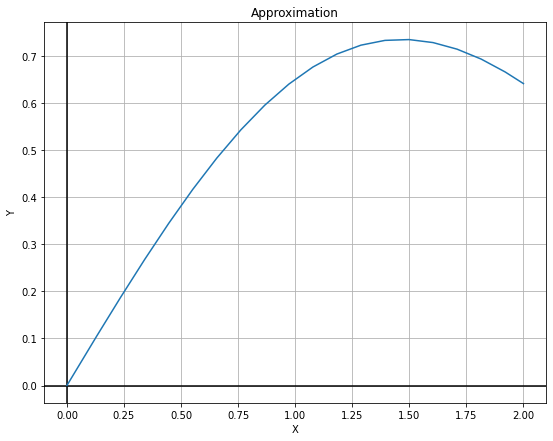

In [13]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$x''+4x=cos(2t)$$ 
$$ x(0)=1, x'(0)=-1$$
$$ func\_appr = 1 - x + x^2*NN(x) $$
$$true\_solution = \frac{1}{4}*x * sin(2*x) + cos(2*x) - \frac{1}{2}sin(2*x)$$

In [14]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1

differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    + 4 * function
    - torch.cos(2*variable)
)

# representing approximation of function so that it satisfies the boundary conditions
# f(0) = 0  f(1) = 1
approximation_of_function = (
    lambda x, nn_model_value: 
    1 - x + x * x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)

In [15]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.49it/s]

train Loss: 1.5530



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 163.54it/s]

val Loss: 0.4036
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 47.62it/s]

train Loss: 0.6037



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 133.05it/s]

val Loss: 0.5975
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.75it/s]

train Loss: 0.5751



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 141.22it/s]

val Loss: 0.1523
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.23it/s]

train Loss: 0.2335



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 135.50it/s]

val Loss: 0.3268
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.12it/s]

train Loss: 0.2307



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 156.56it/s]

val Loss: 0.1322
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 47.73it/s]

train Loss: 0.0752



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.06it/s]

val Loss: 0.1991
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 52.09it/s]

train Loss: 0.0584



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 160.70it/s]

val Loss: 0.1223
Epoch 7/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 47.19it/s]

train Loss: 0.0527



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 157.67it/s]

val Loss: 0.2588
Epoch 8/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.69it/s]

train Loss: 0.0731



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 152.03it/s]

val Loss: 0.1470
Epoch 9/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.74it/s]

train Loss: 0.0909



 70%|████████████████████████████████                                                           | 0/20 [00:00<?, ?it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10082 characters

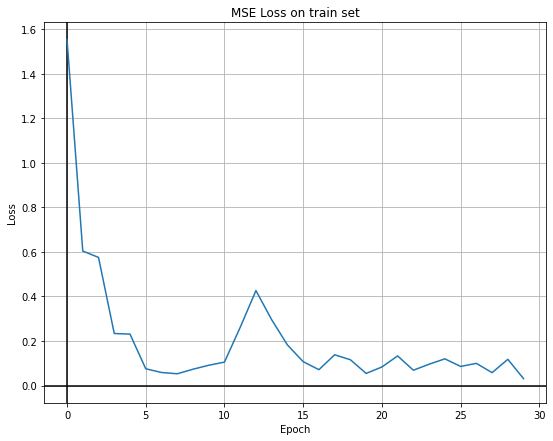

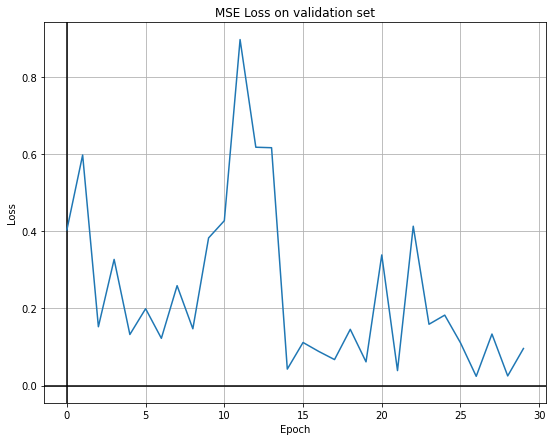

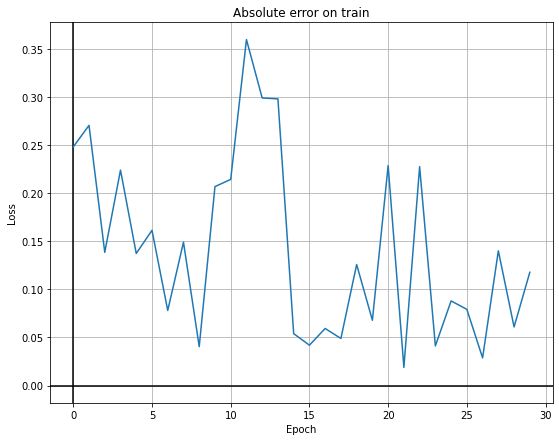

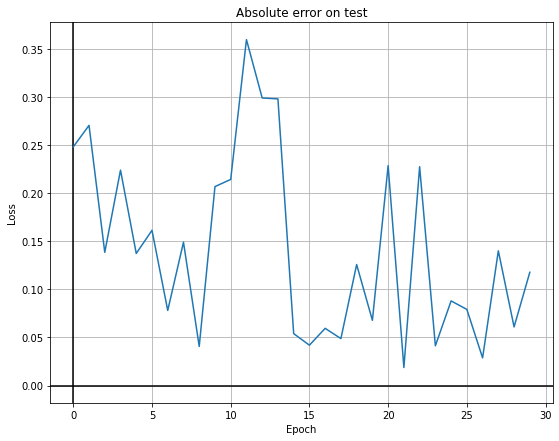

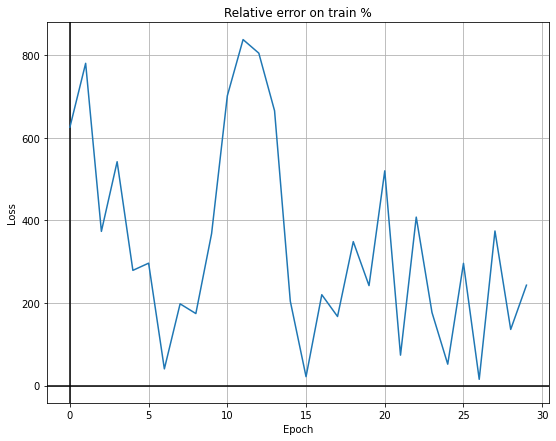

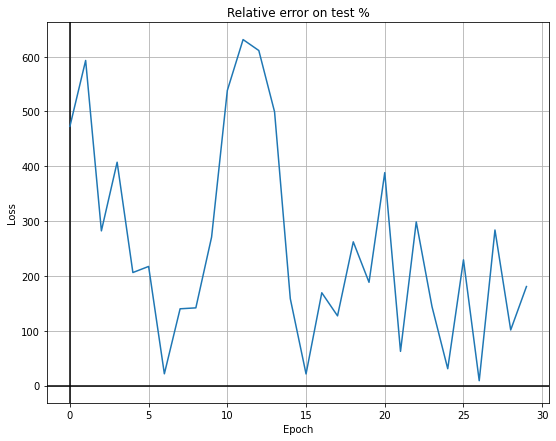

In [16]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.11787521839141846
Train relative error: 242.8783721923828 %
Valid absolute error: 0.11787521839141846
Valid relative error: 180.56809997558594 %


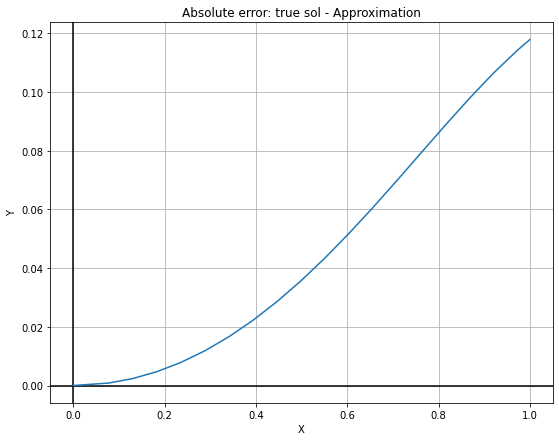

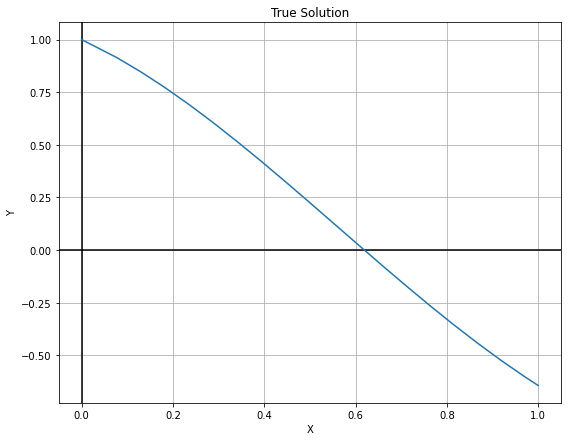

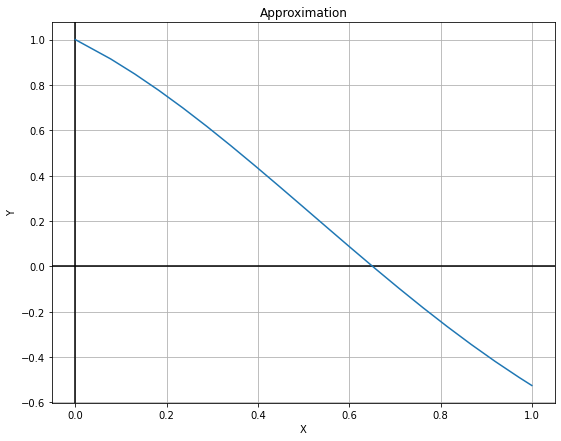

In [17]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$x''' - 3x'' + 3x' -x = exp(t)$$ 
$$x(0)=1, x'(0)=-1, x''(0)=1$$
$$ func\_appr = 1 - x + \frac{x^2}{2} + x^3 * NN(x)$$
$$true\_solution = exp(x) * (\frac{1}{6}*x^3 + 2*x^2-2*x+1)$$

In [18]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1

# in this case it is: u_xx + 0.2* u_x + u = -0.2 * exp(-x/5) * cos(x)
differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 3)
    - 3 * nth_derivative(function, variable, 2)
    + 3 * nth_derivative(function, variable, 1)
    - function
    - torch.exp(variable)
)

# representing approximation of function so that it satisfies the boundary conditions
# f(0) = 0  f(1) = 1
approximation_of_function = (
    lambda x, nn_model_value: 
    1 - x + x * x / 2 + x * x * x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.exp(x) * (1/6*x*x*x + 1 - 2* x + 2 * x*x)

In [19]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 17.57it/s]


train Loss: 105.6552


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 45.43it/s]

val Loss: 37.8542
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 16.98it/s]

train Loss: 46.8978



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 48.67it/s]

val Loss: 22.3670
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.41it/s]

train Loss: 38.0239



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 40.91it/s]

val Loss: 16.1336
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 16.57it/s]

train Loss: 16.9536



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 44.82it/s]

val Loss: 10.7673
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 17.03it/s]

train Loss: 17.6308



100%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:00<00:00, 45.20it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10082 characters

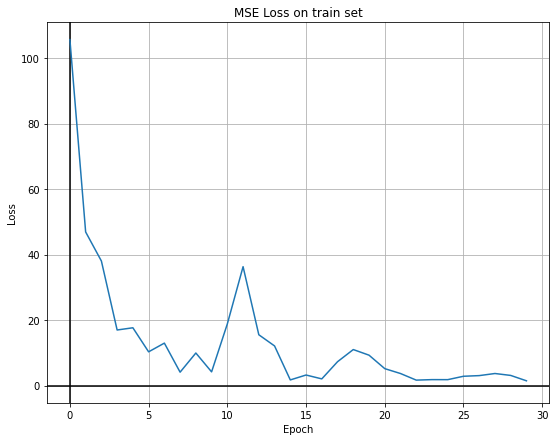

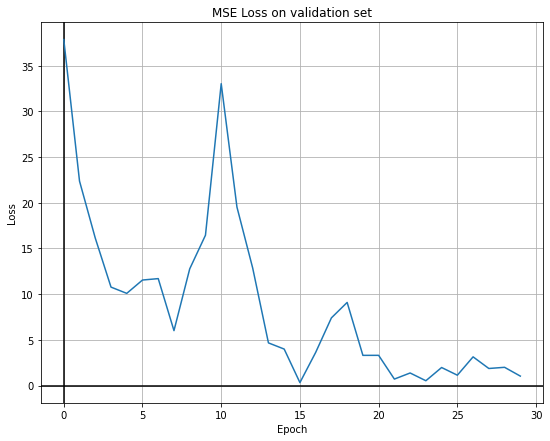

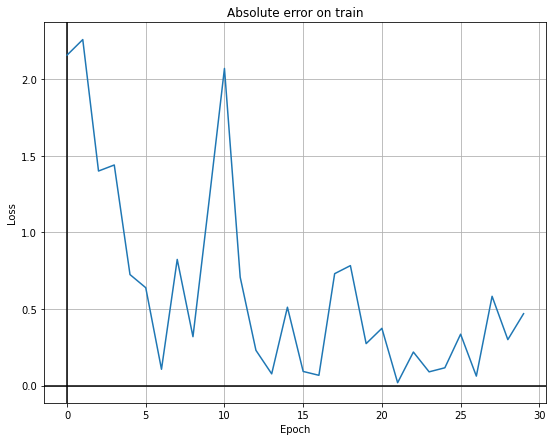

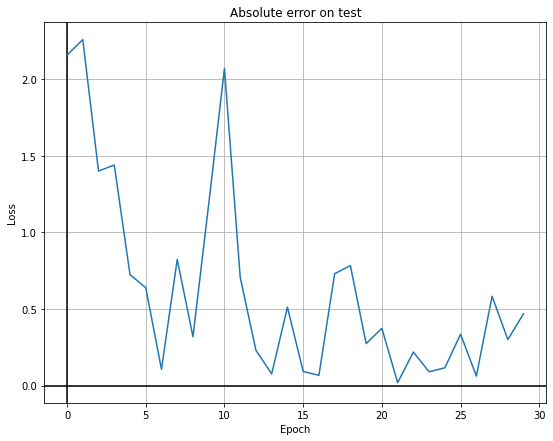

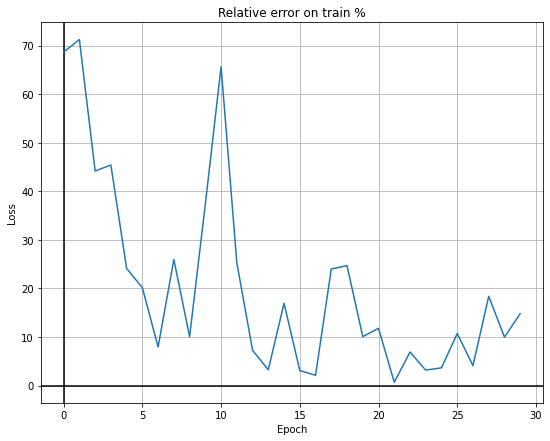

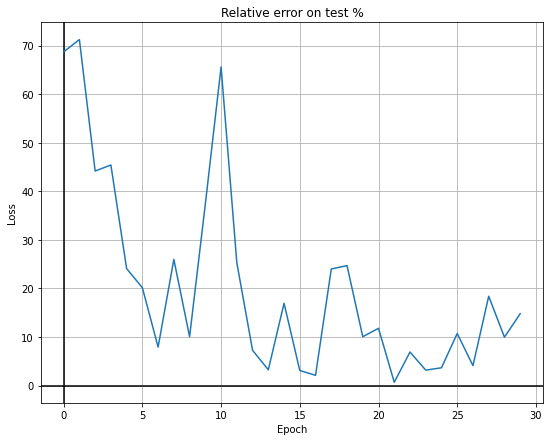

In [20]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.46895456314086914
Train relative error: 14.787322044372559 %
Valid absolute error: 0.46895456314086914
Valid relative error: 14.787322044372559 %


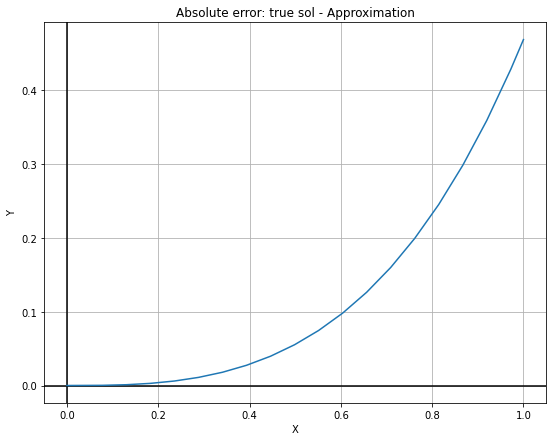

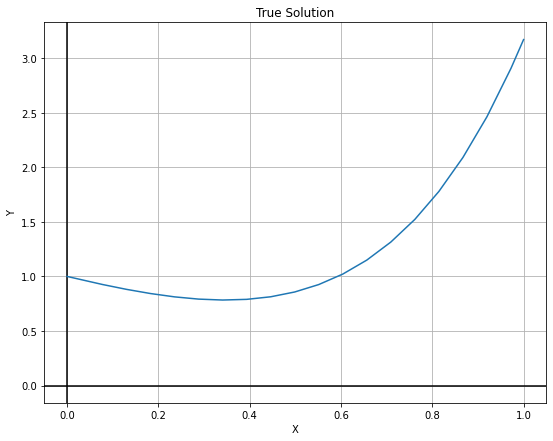

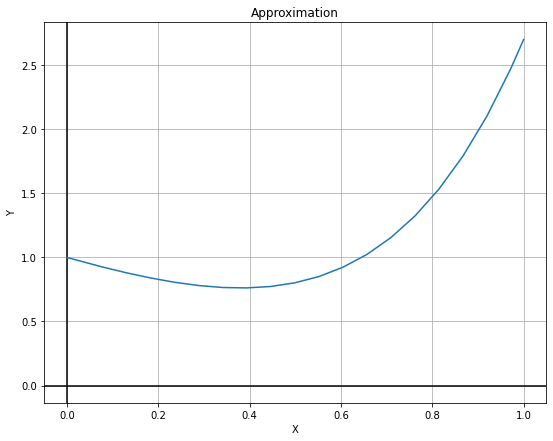

In [21]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$u'' + u = -x $$ 
$$u(0) = u(1) = 0$$
$$ func\_appr = x * (1-x) * NN(x)$$
$$true\_solution = \frac{sin(x)}{sin(1)} - x$$

In [22]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1


differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    + function
    + variable
)


approximation_of_function = (
    lambda x, nn_model_value: 
    x * (1-x) * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.sin(x)/torch.sin(torch.Tensor([1])) - x

In [23]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 59.69it/s]

train Loss: 0.3398



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 151.92it/s]

val Loss: 1.0700
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.45it/s]

train Loss: 0.4369



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 129.38it/s]

val Loss: 2.3206
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.34it/s]

train Loss: 0.7738



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 144.09it/s]

val Loss: 5.3448
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.86it/s]

train Loss: 1.5634



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 129.91it/s]

val Loss: 1.9102
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 48.66it/s]

train Loss: 0.6041



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 128.55it/s]

val Loss: 6.5665
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.37it/s]

train Loss: 1.5209



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 158.95it/s]

val Loss: 0.9822
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.67it/s]

train Loss: 0.5716



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 143.95it/s]

val Loss: 5.1078
Epoch 7/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.82it/s]

train Loss: 1.0966



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.25it/s]


val Loss: 1.7073
Epoch 8/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 52.36it/s]

train Loss: 0.6679



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.25it/s]

val Loss: 4.2163
Epoch 9/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 51.28it/s]

train Loss: 0.8110



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 157.93it/s]

val Loss: 1.5739
Epoch 10/29:



  0%| 

limit_output extension: Maximum message size of 10000 exceeded with 10113 characters

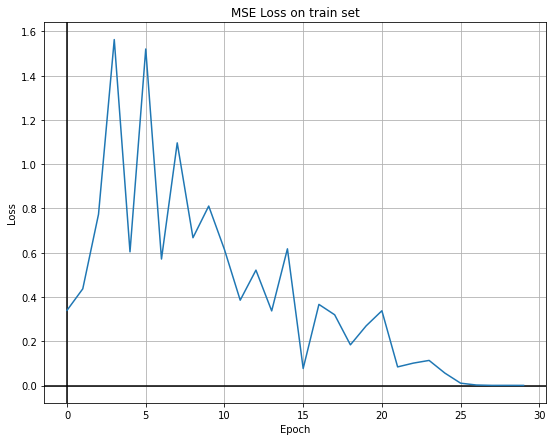

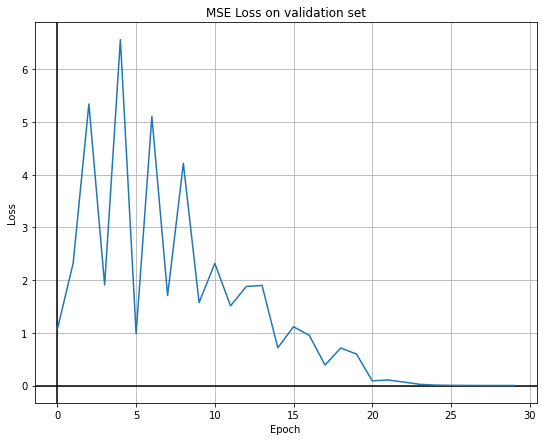

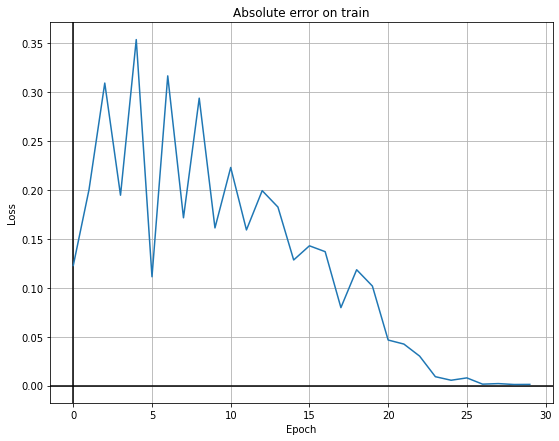

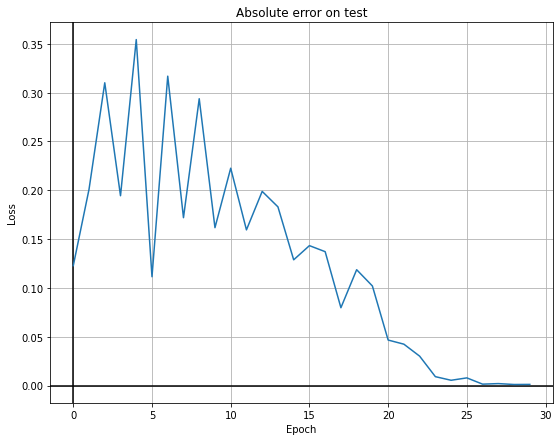

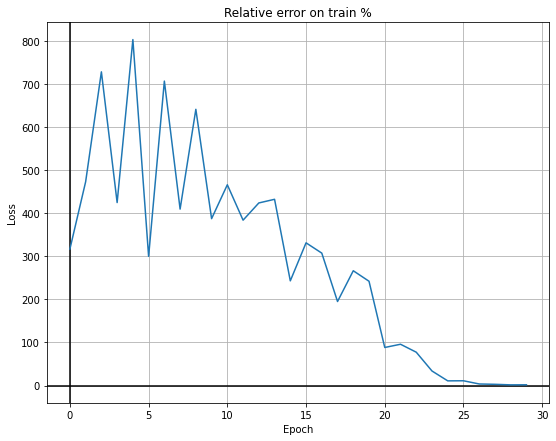

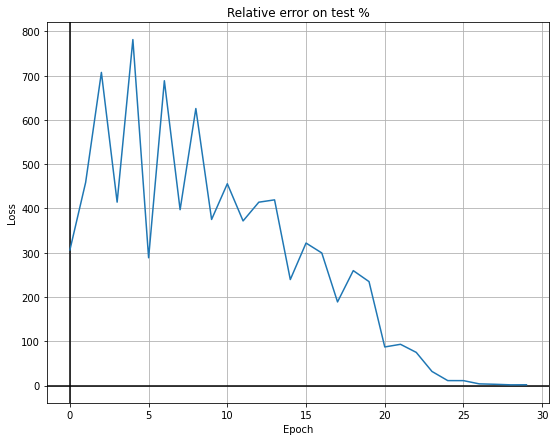

In [24]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.0011230409145355225
Train relative error: 1.6230145692825317 %
Valid absolute error: 0.0011227279901504517
Valid relative error: 1.626753807067871 %


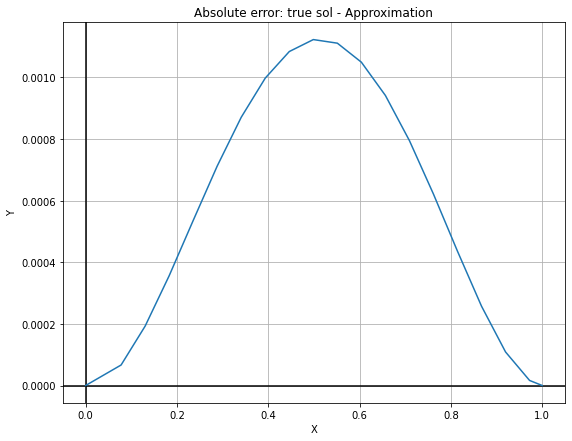

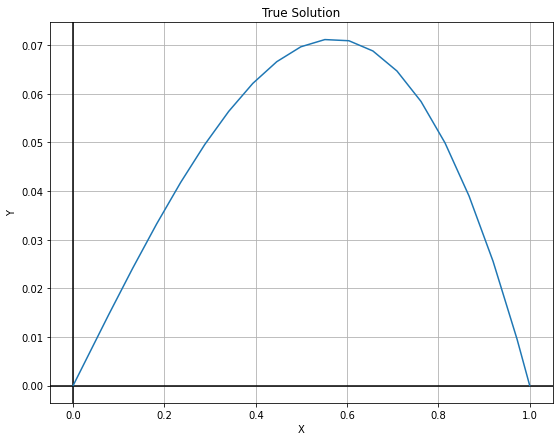

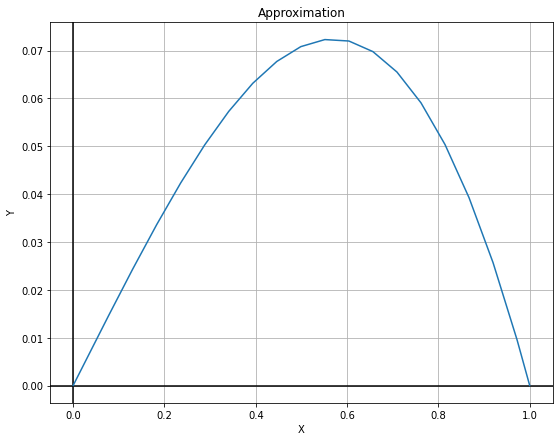

In [25]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$x'' + x' = 1$$
$$ x'(0) = 0, x(\frac{\pi}{2})-x'(\frac{\pi}{2})= 2$$
$$ func\_appr = 2 + x * x * (\pi/2-x) * (\pi/2-x) * NN(x)$$

In [26]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = pi/2


differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    + function
    - 1
)


approximation_of_function = (
    lambda x, nn_model_value: 
    x * x * (pi/2-x) * (pi/2-x) * nn_model_value + 2
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.Tensor([1]) + torch.cos(x)

In [27]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.35it/s]

train Loss: 6.8861



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 146.57it/s]

val Loss: 4.5229
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 50.32it/s]

train Loss: 3.6467



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 127.73it/s]

val Loss: 0.9755
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 46.53it/s]

train Loss: 1.7243



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 135.50it/s]

val Loss: 1.1151
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 43.12it/s]

train Loss: 2.1067



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 127.71it/s]

val Loss: 1.0568
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 44.02it/s]

train Loss: 1.3486



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 126.12it/s]

val Loss: 1.1890
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 44.32it/s]

train Loss: 1.5550



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 141.60it/s]

val Loss: 0.9911
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 44.07it/s]

train Loss: 1.2472



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 112.66it/s]

val Loss: 1.0338
Epoch 7/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 45.29it/s]

train Loss: 1.3336



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 120.08it/s]

val Loss: 0.9672
Epoch 8/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 48.34it/s]


train Loss: 1.1573


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 123.03it/s]

val Loss: 0.9778
Epoch 9/29:



 75%|████████████████████████████████████████████████████                              | 10/20 [00:00<00:00, 40.91it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10062 characters

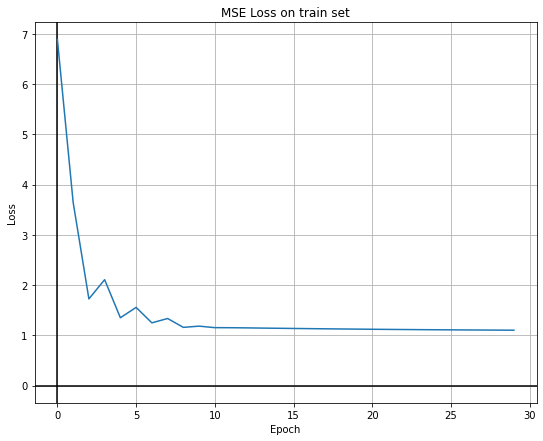

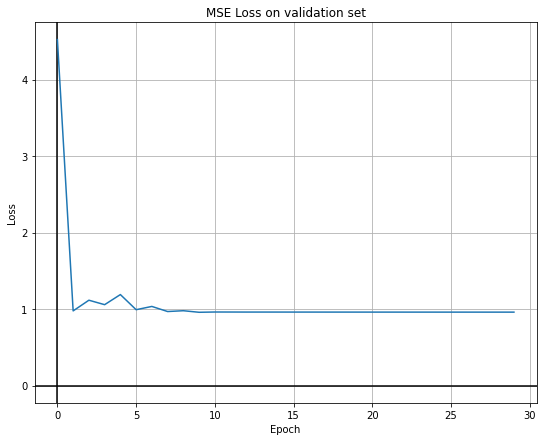

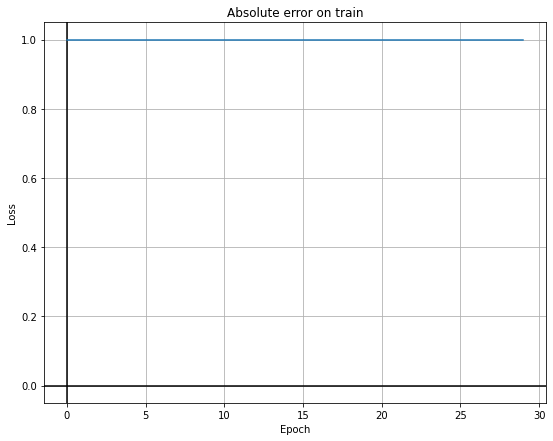

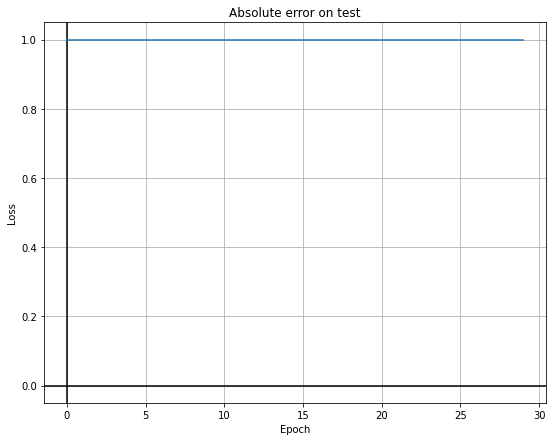

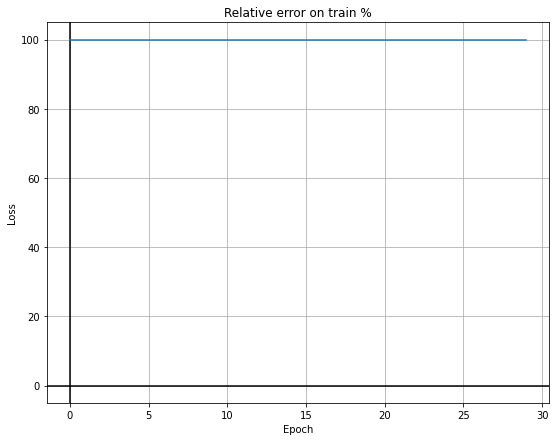

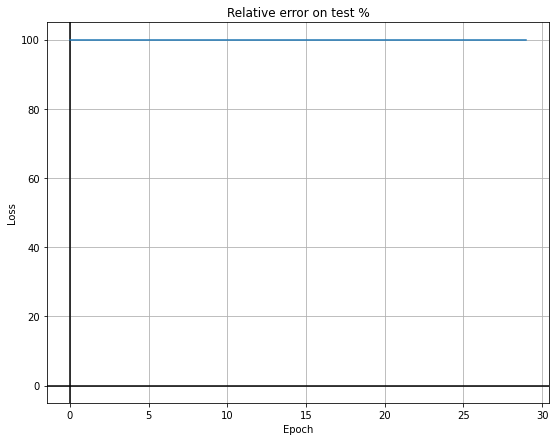

In [28]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 1.0
Train relative error: 100.00001525878906 %
Valid absolute error: 1.0
Valid relative error: 100.00001525878906 %


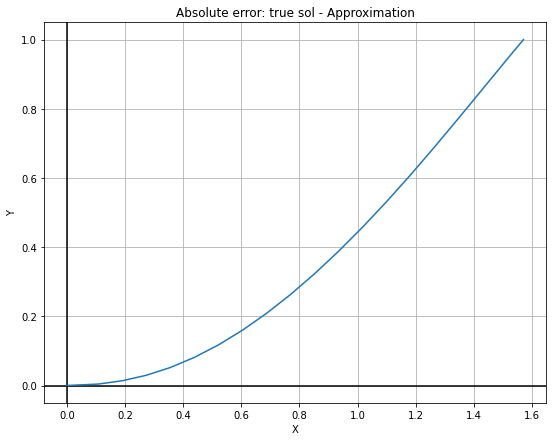

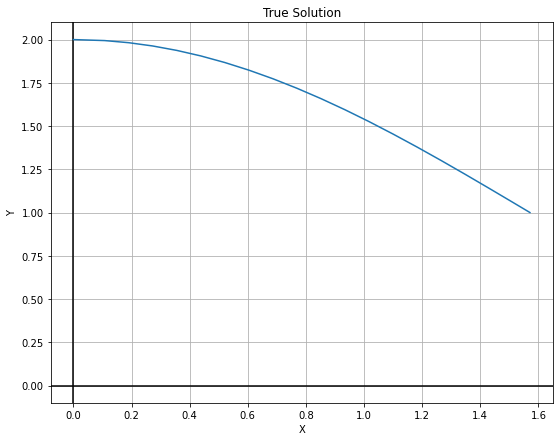

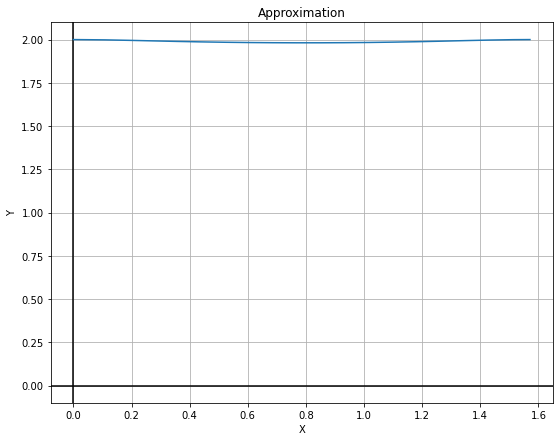

In [29]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$ y'' -y = 4exp(x)$$
$$ y(0) = 0, y'(0) = 1 $$
$$ func\_appr = x + x^2 * NN(x)$$
$$ true\_solution = 2 * x * exp(x) - sinh(x) $$

In [30]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1


differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 2)
    - function
    - 4 * torch.exp(variable)
)


approximation_of_function = (
    lambda x, nn_model_value: 
    x + x * x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return 2 * x * torch.exp(x) - torch.sinh(x)

In [31]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.35it/s]

train Loss: 3.1055



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 154.03it/s]

val Loss: 82.8483
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 48.18it/s]

train Loss: 20.1044



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 136.18it/s]

val Loss: 12.1778
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 52.20it/s]

train Loss: 10.6232



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 143.24it/s]

val Loss: 1.7412
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 48.97it/s]

train Loss: 2.0426



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.90it/s]

val Loss: 1.7276
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.09it/s]

train Loss: 2.0265



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 142.17it/s]

val Loss: 1.0639
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 52.29it/s]

train Loss: 1.4902



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 163.17it/s]

val Loss: 0.9190
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 52.54it/s]

train Loss: 1.4543



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 137.35it/s]

val Loss: 1.0857
Epoch 7/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.74it/s]

train Loss: 1.4115



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 146.09it/s]

val Loss: 0.6393
Epoch 8/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.36it/s]

train Loss: 1.0863



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 154.62it/s]


val Loss: 1.0024
Epoch 9/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 53.74it/s]

train Loss: 1.3086



100%|████████████████████████████████████████████████████████████████████████▉        | 18/20 [00:00<00:00, 166.62it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10086 characters

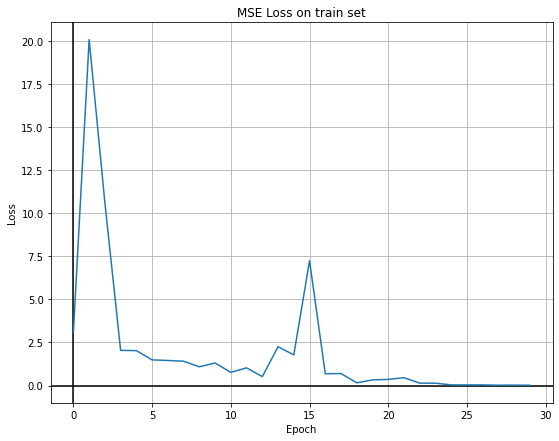

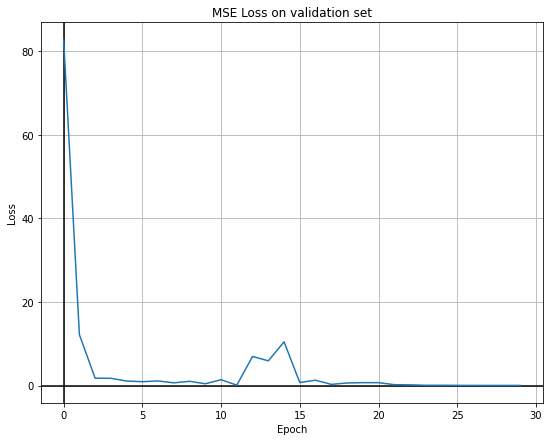

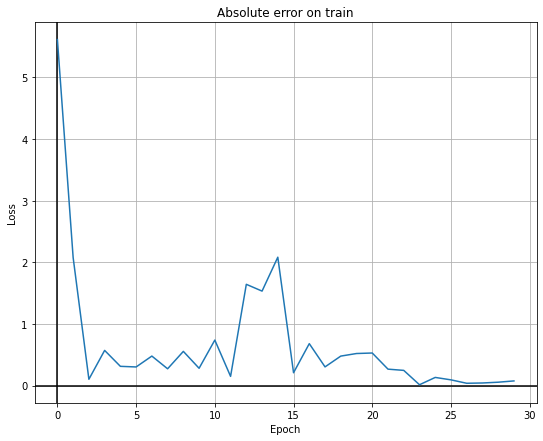

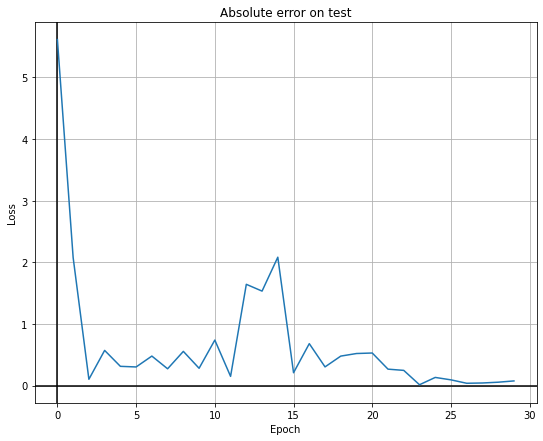

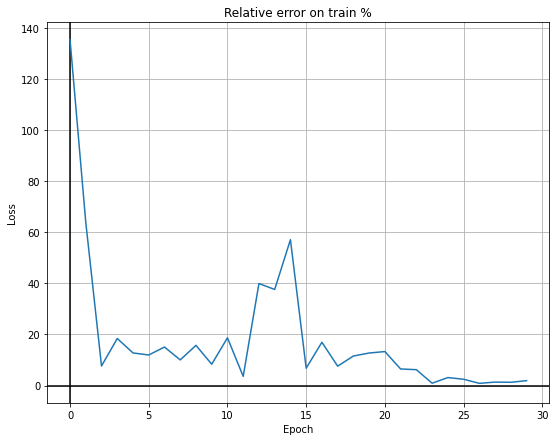

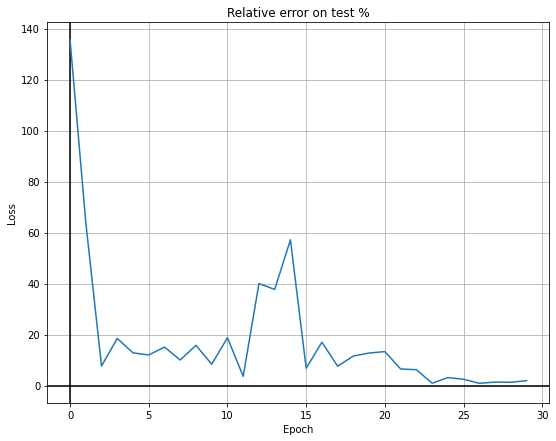

In [32]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.07427692413330078
Train relative error: 1.9023689031600952 %
Valid absolute error: 0.07427692413330078
Valid relative error: 1.901726484298706 %


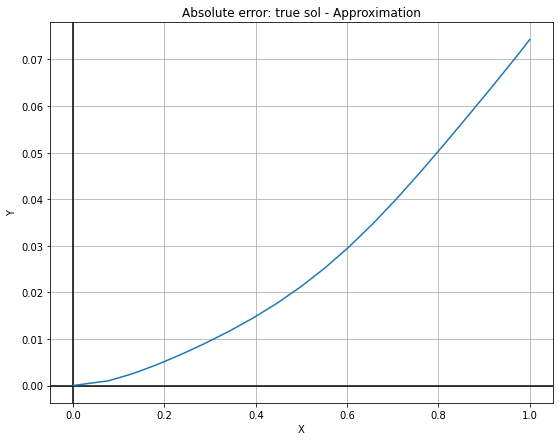

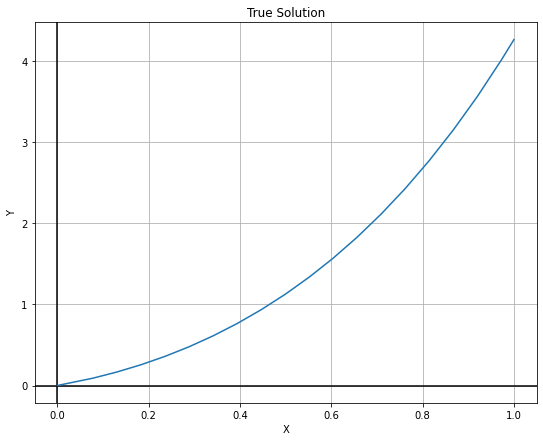

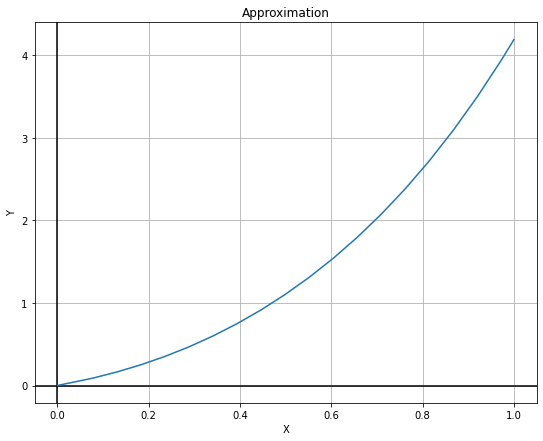

In [33]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$ (1+x^2)y''-2xy = 0 $$
$$ y(0)=0, y'(0)=3 $$
$$ func\_appr = 3*x + x^2 * NN(x)$$
$$true\_solution = x^3 + 3*x$$

In [34]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1


differential_operator = (
    lambda function, variable: (1 + variable*variable) * nth_derivative(function, variable, 2)
    - 2 * variable * function
)


approximation_of_function = (
    lambda x, nn_model_value: 
    3 * x + x * x * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return x * x * x + 3 * x

In [35]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 55.38it/s]

train Loss: 0.1611



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 165.73it/s]

val Loss: 12.2297
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 59.15it/s]

train Loss: 1.5522



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 160.43it/s]

val Loss: 15.3766
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 59.56it/s]

train Loss: 3.6524



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 175.10it/s]

val Loss: 38.5823
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.69it/s]

train Loss: 6.7680



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 152.41it/s]

val Loss: 2.2420
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.94it/s]

train Loss: 0.7313



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 151.92it/s]

val Loss: 16.9447
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 61.55it/s]

train Loss: 3.1760



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 155.08it/s]

val Loss: 0.9558
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 65.82it/s]

train Loss: 0.6767



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 168.52it/s]

val Loss: 1.1377
Epoch 7/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 56.21it/s]

train Loss: 1.1312



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 156.68it/s]

val Loss: 1.4280
Epoch 8/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 61.07it/s]

train Loss: 0.8001



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 173.79it/s]

val Loss: 0.0613
Epoch 9/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 62.56it/s]

train Loss: 0.1345



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 143.24it/s]

val Loss: 0.0735
Epoch 10/29:



 90%|█████████████████████████████████████████████████▏                                | 12/20 [00:00<00:00, 53.49it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10117 characters

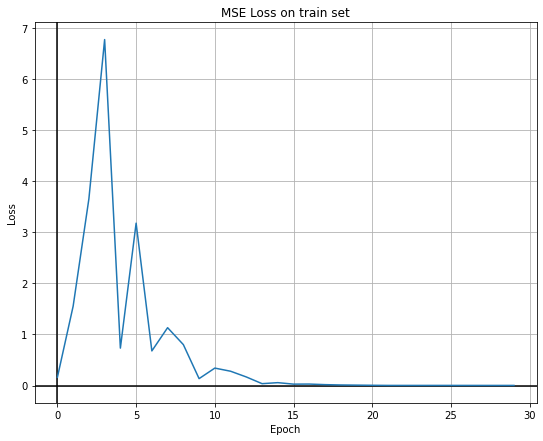

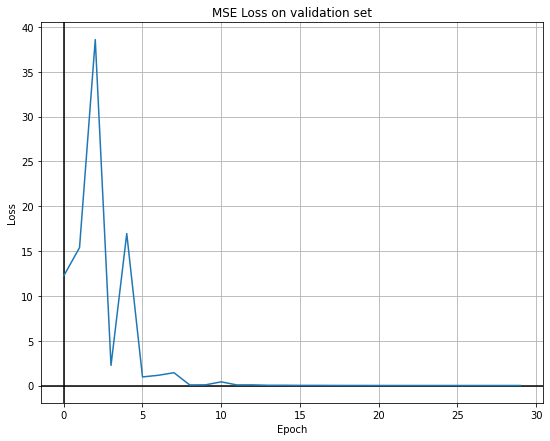

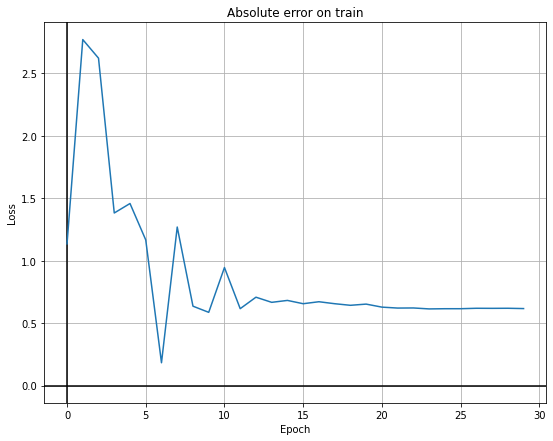

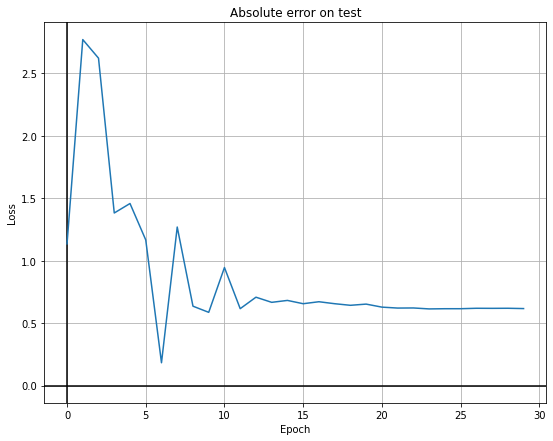

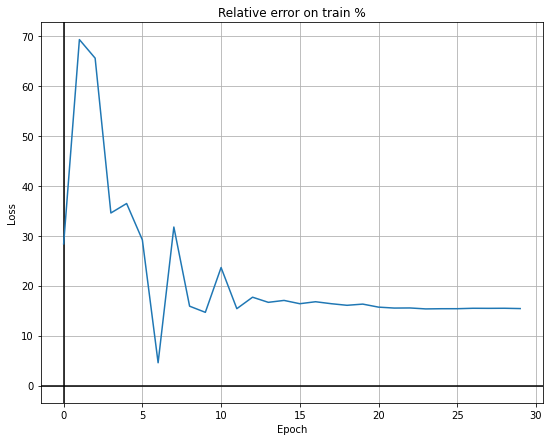

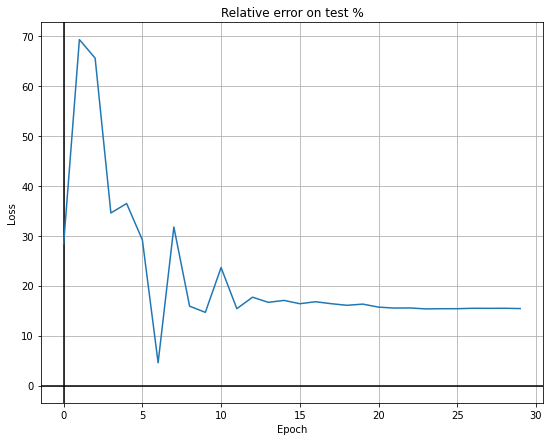

In [36]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.6158785820007324
Train relative error: 15.396965026855469 %
Valid absolute error: 0.6158785820007324
Valid relative error: 15.396965026855469 %


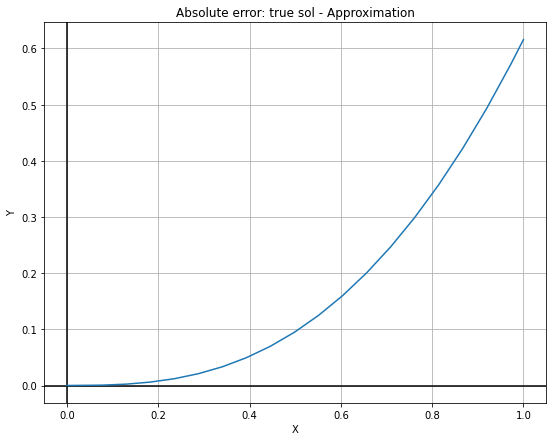

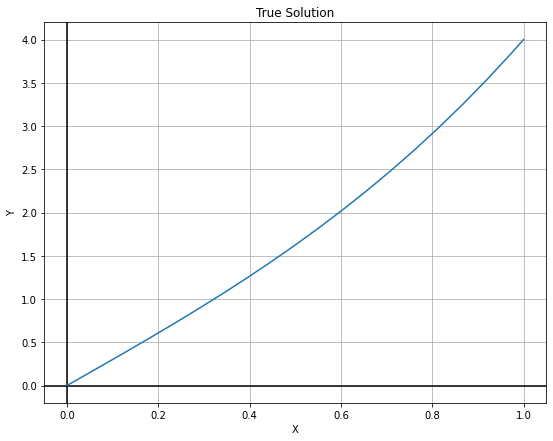

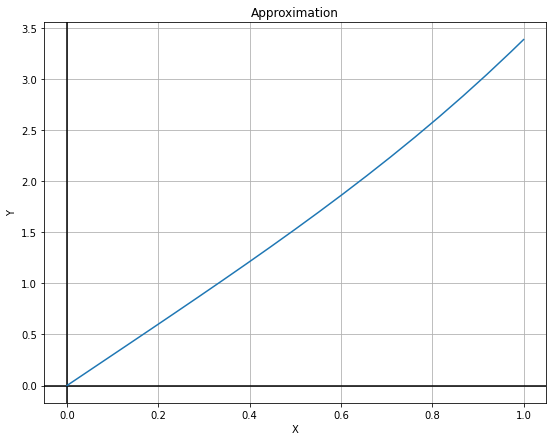

In [37]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$yy''- (y')^2 = y^4$$
$$ y'(0) = 0, y(0) = 1 $$
$$ func\_appr = 1 + x^2*NN(x) $$
$$ true\_sol =  \frac{1}{cos(x)}$$

In [3]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1


differential_operator = (
    lambda function, variable: function * nth_derivative(function, variable, 2)
    - (nth_derivative(function, variable, 1))**2 - function**4
)


approximation_of_function = (
    lambda x, nn_model_value: 
    1 + x*x*nn_model_value)

# analytical solution of the equation
def true_analytical_solution(x):
    return 1/torch.cos(x)

In [4]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 40.11it/s]


train Loss: 2.0946


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.36it/s]

val Loss: 0.6717
Epoch 1/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 143.90it/s]

train Loss: 1.2067



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 345.75it/s]

val Loss: 0.4092
Epoch 2/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 147.45it/s]

train Loss: 0.7209



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 339.87it/s]

val Loss: 0.4896
Epoch 3/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 146.78it/s]

train Loss: 0.9481



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 358.09it/s]

val Loss: 0.7267
Epoch 4/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.09it/s]

train Loss: 0.8924



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 339.88it/s]

val Loss: 0.4032
Epoch 5/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 120.80it/s]

train Loss: 0.4436



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 339.89it/s]

val Loss: 0.4024
Epoch 6/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.55it/s]

train Loss: 0.5857



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 334.22it/s]

val Loss: 0.3797
Epoch 7/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 134.59it/s]

train Loss: 0.4845



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 328.73it/s]

val Loss: 0.4383
Epoch 8/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 149.66it/s]

train Loss: 0.6104



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 339.93it/s]

val Loss: 0.3737
Epoch 9/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 140.23it/s]

train Loss: 0.4447



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 308.52it/s]

val Loss: 0.4105
Epoch 10/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 148.54it/s]

train Loss: 0.5786



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 290.63it/s]

val Loss: 0.3657
Epoch 11/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 125.34it/s]

train Loss: 0.4366



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 345.75it/s]

val Loss: 0.4003
Epoch 12/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 159.99it/s]

train Loss: 0.5666



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 371.46it/s]

val Loss: 0.3582
Epoch 13/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 141.20it/s]

train Loss: 0.4303



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 345.75it/s]

val Loss: 0.3963
Epoch 14/29:



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 131.93it/s]

train Loss: 0.5620



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 364.61it/s]

val Loss: 0.3519
Epoch 15/29:



  0%|                                                                                           | 0/20 [00:00<?

limit_output extension: Maximum message size of 10000 exceeded with 10008 characters

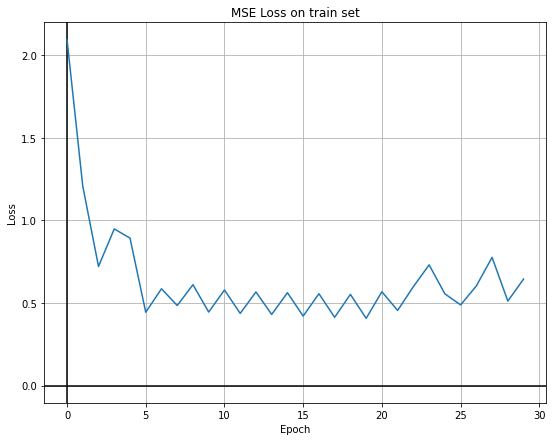

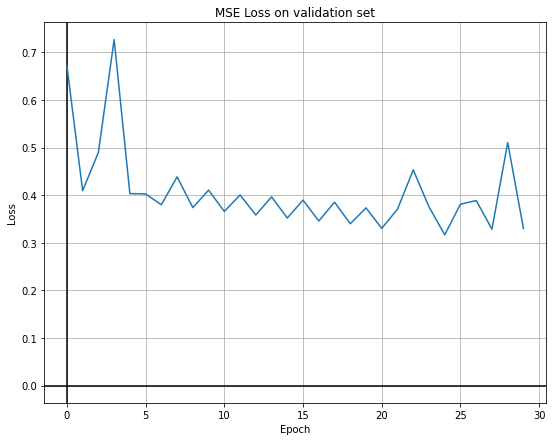

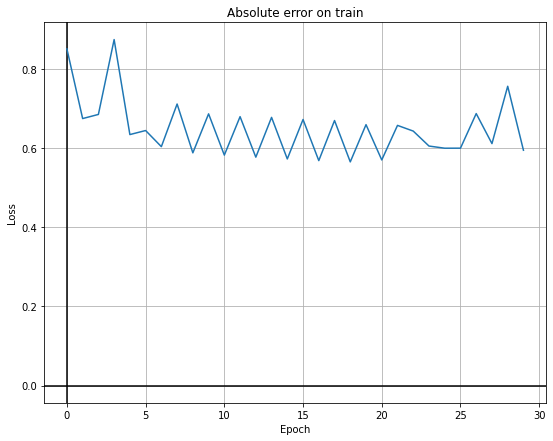

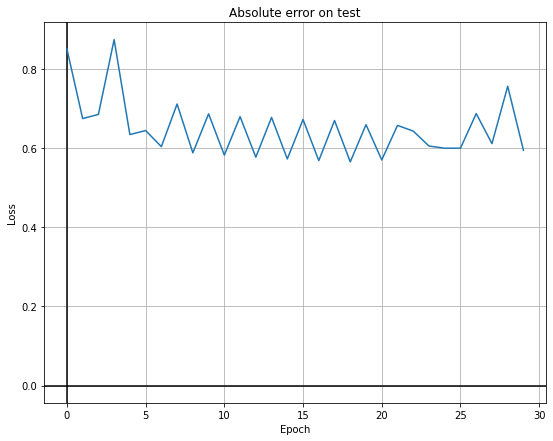

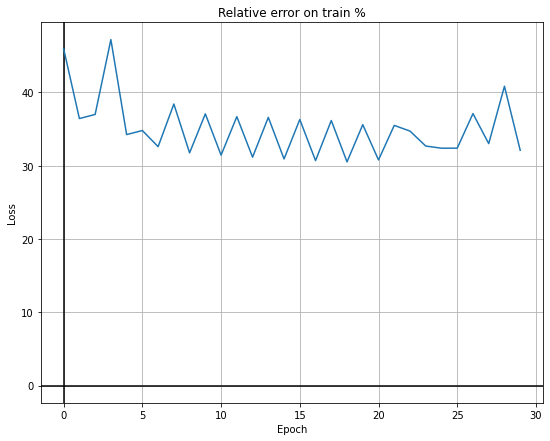

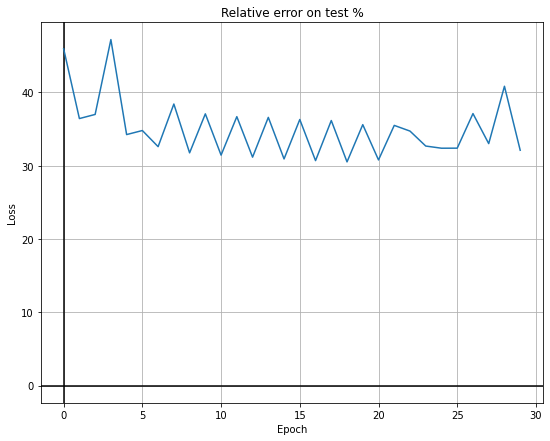

In [5]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.5940542221069336
Train relative error: 32.096885681152344 %
Valid absolute error: 0.5940542221069336
Valid relative error: 32.096885681152344 %


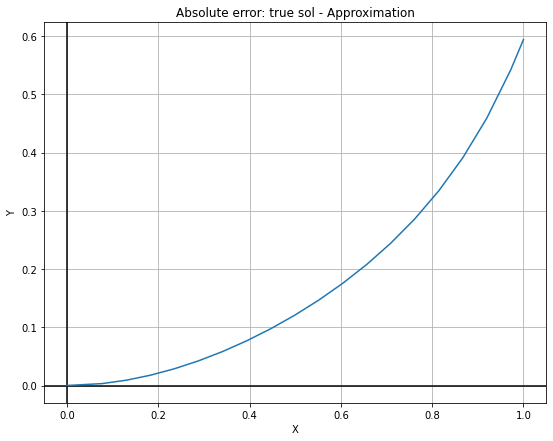

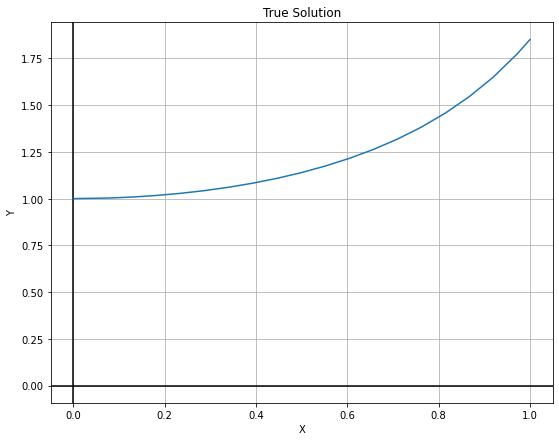

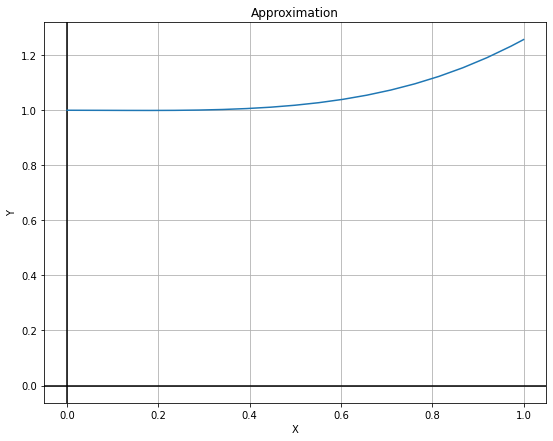

In [6]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$y'''+ y'' = \frac{x-1}{x^2}$$
$$ y(1) = \frac{1+e}{e}$$
$$ y'(1) = -\frac{1+e}{e} $$
$$ y''(1) = \frac{1-e}{e} $$
$$ func\_appr = \frac{1+e}{e} -\frac{1+e}{e} * (x-1) + \frac{1-e}{e} * \frac{(x-1)^2}{2} + (x-1)^3 * NN(x) $$
$$ true\_sol =  -4x + xln(x) + 7 - 2exp(1-x) + exp(-x)$$

In [36]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 1
right_bound = 2


differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 2)
    - (variable-1)/(variable**2)
)


approximation_of_function = (
    lambda x, nn_model_value: 
    (1+e)/e - (1+e)/e*(x-1) + (1-e)/e * (x-1)**2/2 + (x-1)**3 * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)

In [37]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 67.43it/s]

train Loss: 0.1446



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 145.57it/s]

val Loss: 0.0138
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 71.12it/s]

train Loss: 0.0150



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 149.01it/s]

val Loss: 0.1450
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 71.29it/s]

train Loss: 0.0926



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 154.40it/s]

val Loss: 0.0689
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 71.54it/s]

train Loss: 0.0269



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 146.60it/s]

val Loss: 0.1320
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 75.04it/s]

train Loss: 0.0800



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 145.32it/s]

val Loss: 0.0207
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 62.25it/s]

train Loss: 0.0183



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 132.81it/s]

val Loss: 0.0253
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 62.86it/s]

train Loss: 0.0113



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 151.84it/s]

val Loss: 0.0075
Epoch 7/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 70.47it/s]

train Loss: 0.0114



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 170.76it/s]

val Loss: 0.0419
Epoch 8/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 75.75it/s]

train Loss: 0.0135



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 178.03it/s]

val Loss: 0.0058


Epoch 9/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 75.82it/s]

train Loss: 0.0088



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 131.07it/s]

val Loss: 0.0409
Epoch 10/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 66.18it/s]

train Loss: 0.0250



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 159.21it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10013 characters

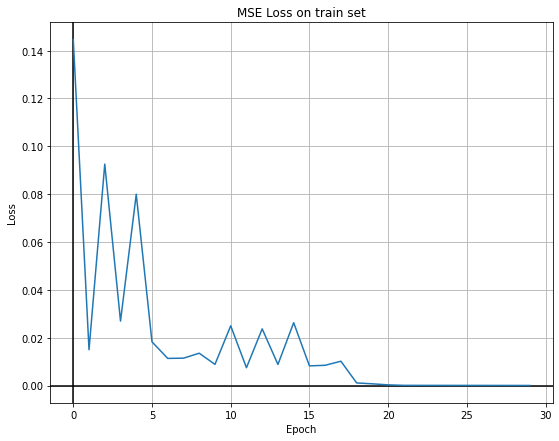

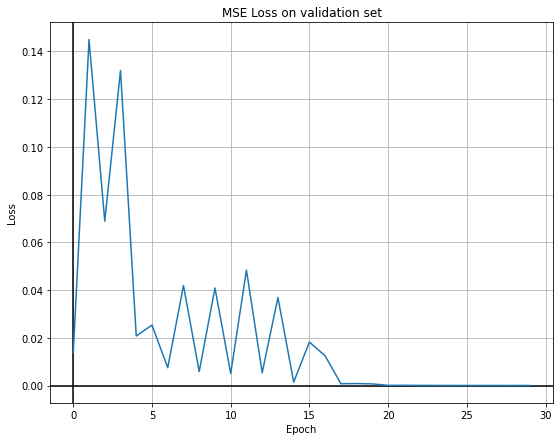

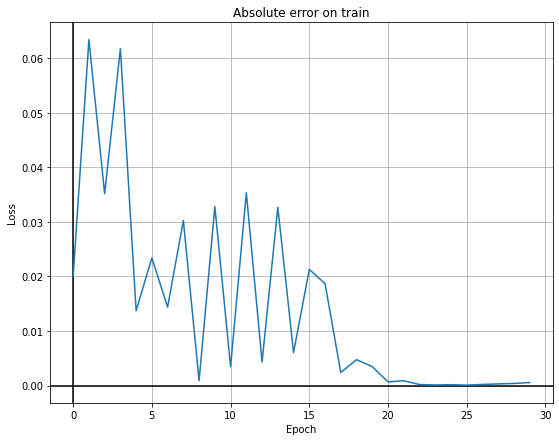

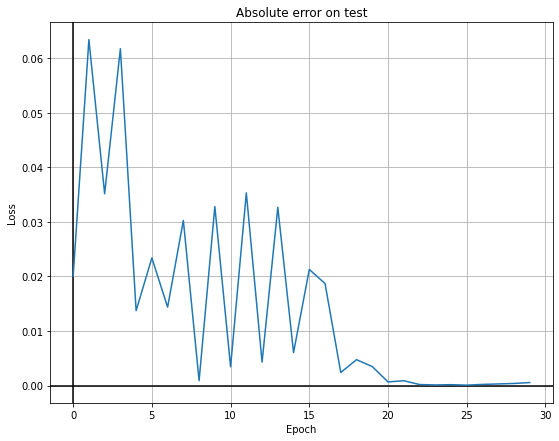

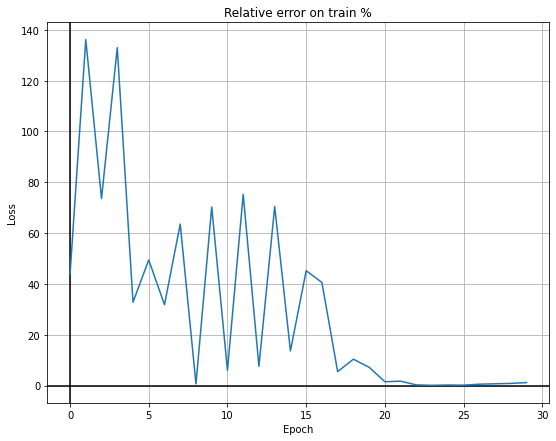

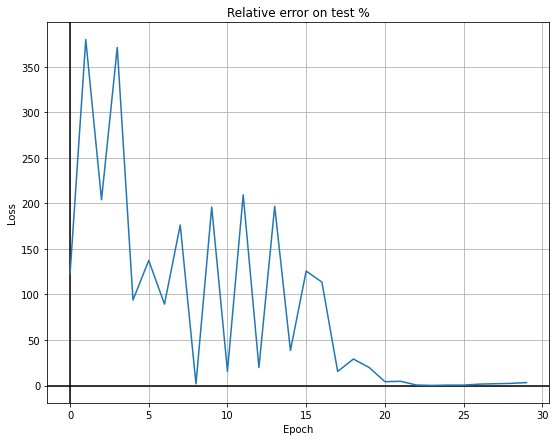

In [38]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.0005410611629486084
Train relative error: 1.1543126106262207 %
Valid absolute error: 0.0005410611629486084
Valid relative error: 3.209203004837036 %


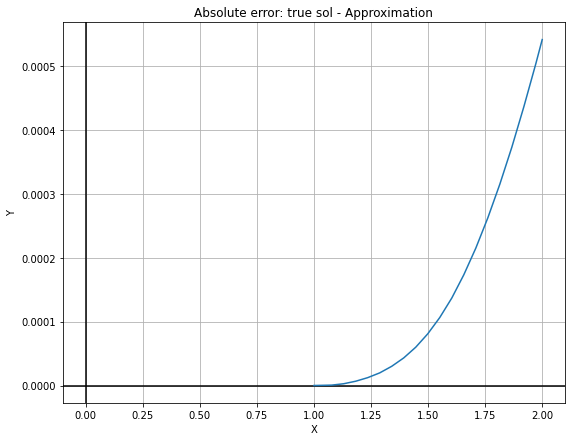

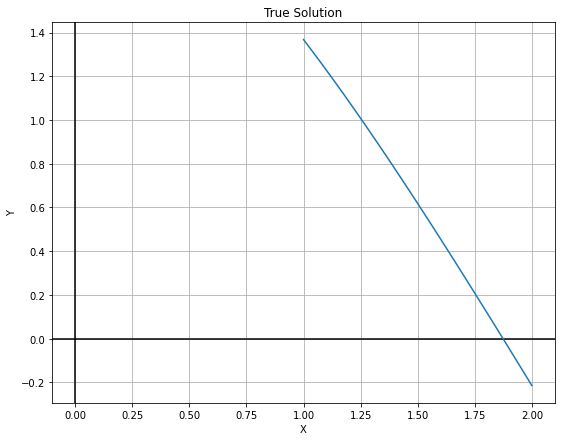

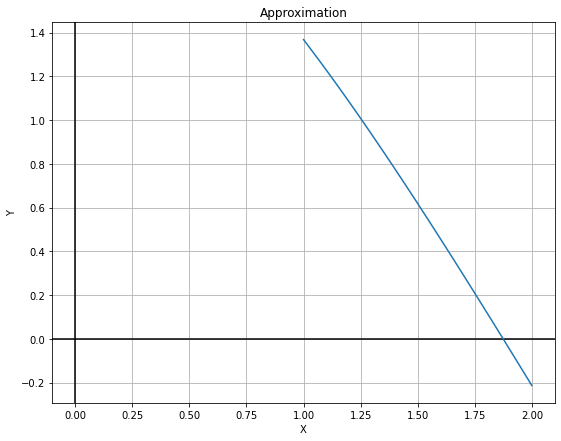

In [39]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$y''''+ y'' = \frac{1 + sin^2(x)}{cos^3(x)}$$
$$ y(0) = 1 $$
$$ y'(0) = 0 $$
$$ y''(0) = 0 $$
$$ y'''(0) = 0 $$
$$ func\_appr = 1 + x^4 * NN(x) $$
$$ true\_sol =  cos(x) + ln(cos(x))*cos(x) + x * sin(x)$$

In [87]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1


differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 4)
    + nth_derivative(function, variable, 2)
    - (1 + torch.sin(variable)*torch.sin(variable))/(torch.cos(variable))**3
)


approximation_of_function = (
    lambda x, nn_model_value: 
    1 + x**4 * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return torch.cos(x) + torch.log(torch.cos(x))* torch.cos(x) + x * torch.sin(x)

In [88]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 36.47it/s]

train Loss: 3.1233



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 87.73it/s]

val Loss: 69.0971
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 36.55it/s]

train Loss: 13.1952



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 96.76it/s]

val Loss: 25.2777
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 38.79it/s]

train Loss: 23.9028



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 83.82it/s]

val Loss: 11.2071
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 39.90it/s]

train Loss: 12.6944



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 95.48it/s]

val Loss: 5.2934
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 37.86it/s]

train Loss: 11.2129



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 86.19it/s]

val Loss: 10.1034
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 38.16it/s]

train Loss: 18.5614



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 79.88it/s]

val Loss: 7.5008
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 37.73it/s]

train Loss: 7.6806



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 82.96it/s]

val Loss: 12.1059
Epoch 7/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 37.98it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10092 characters

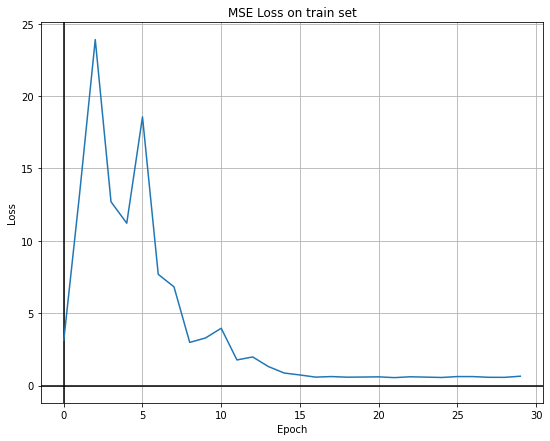

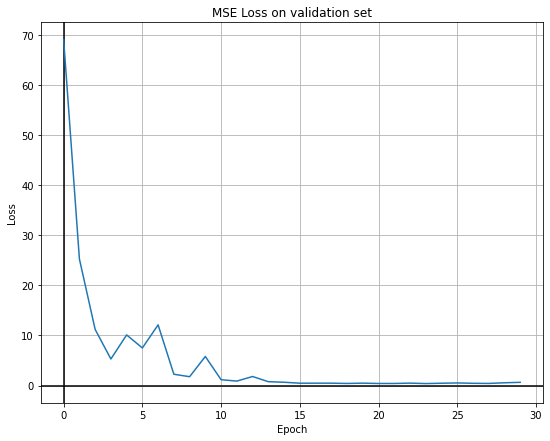

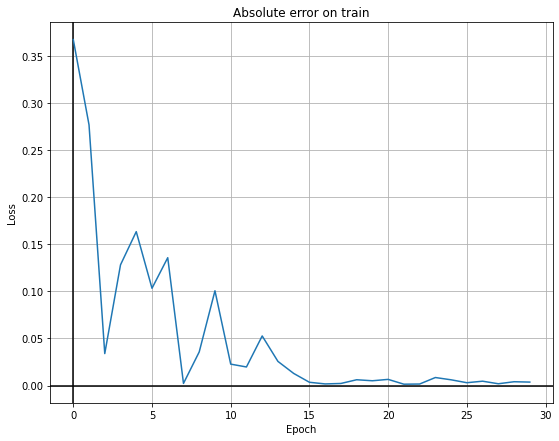

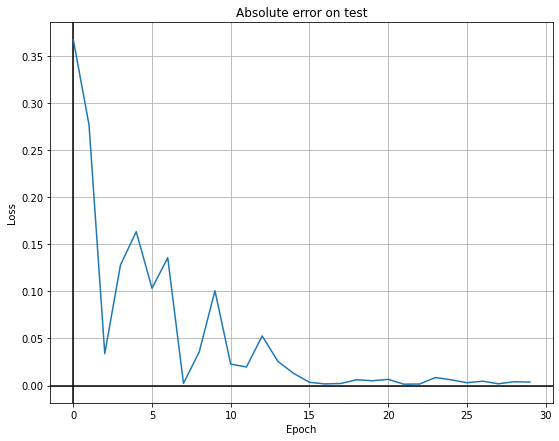

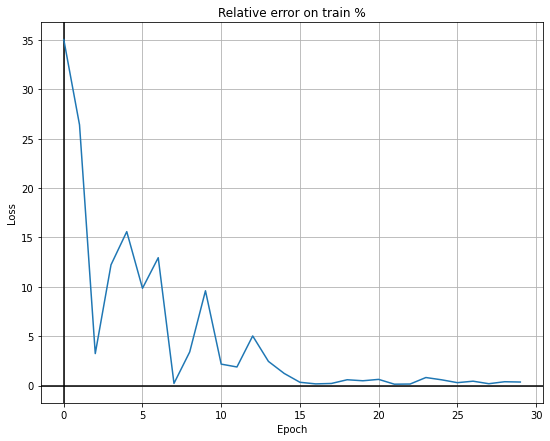

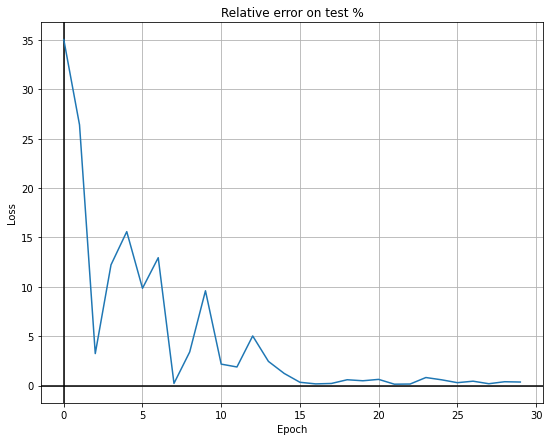

In [89]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.003628253936767578
Train relative error: 0.3521583080291748 %
Valid absolute error: 0.0036389827728271484
Valid relative error: 0.35189470648765564 %


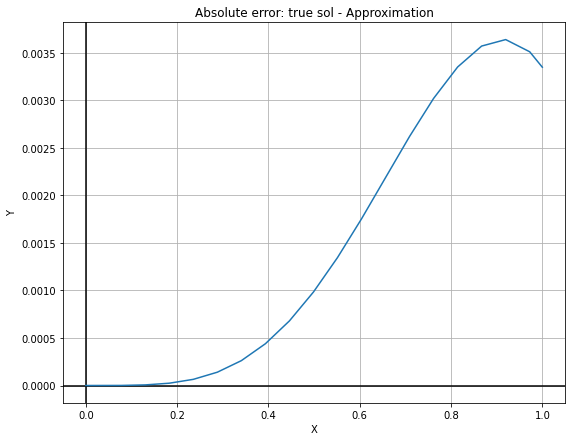

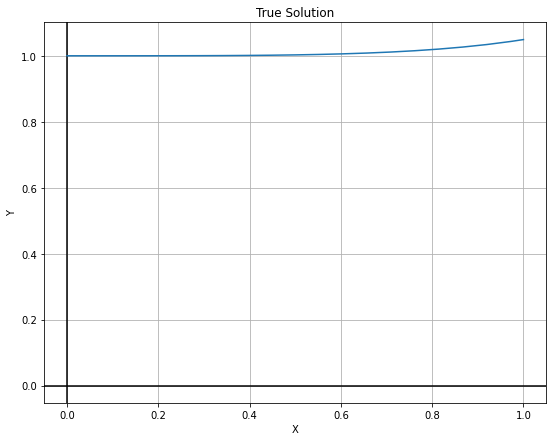

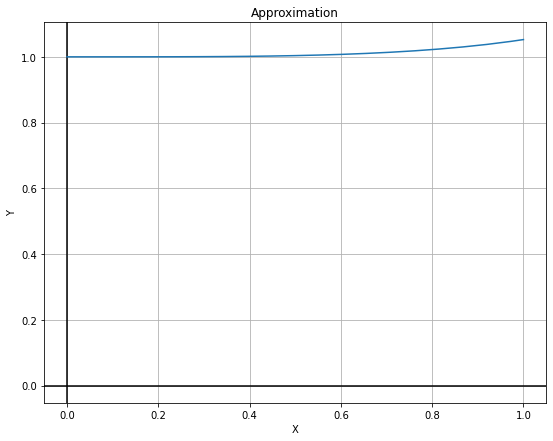

In [90]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)

$$y'''+ y' = x*sin(x) + 3*cos(x)$$
$$ y(0) = 1$$
$$ y'(0) = 2 $$
$$ y''(0) = 0 $$
$$ func\_appr = 1 + 2*x  + x^3 * NN(x) $$
$$ true\_sol =  1/4 * (-(x^2 - 17) * sin(x) - 9 * x * cos(x) + 4)$$

In [99]:
model = CustomClass(number_of_inputs, HiddenNeurons, number_of_outputs)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=1)

left_bound = 0
right_bound = 1


differential_operator = (
    lambda function, variable: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)


approximation_of_function = (
    lambda x, nn_model_value: 
    1 + 2*x + x**3 * nn_model_value
)

# analytical solution of the equation
def true_analytical_solution(x):
    return 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)

In [100]:
train_domain, valid_domain = get_domain(left_bound, right_bound, number_of_points)
nn_model, epochs, mse_loss_train, mse_loss_valid, \
    abs_err_train, abs_err_valid, relative_err_train, relative_err_valid = train_model(
        model,
        LossMSE,
        optimizer,
        scheduler,
        num_epochs,
        train_domain,
        valid_domain,
        approximation_of_function,
        differential_operator,
        true_analytical_solution
    )

Epoch 0/29:


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 79.83it/s]

train Loss: 0.1176



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 217.84it/s]

val Loss: 1.3174
Epoch 1/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 85.15it/s]

train Loss: 0.4307



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 187.42it/s]

val Loss: 1.3314
Epoch 2/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 86.85it/s]

train Loss: 0.6643



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 184.32it/s]

val Loss: 0.0650
Epoch 3/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 79.37it/s]

train Loss: 0.0586



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 220.14it/s]

val Loss: 0.0686
Epoch 4/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 85.04it/s]

train Loss: 0.0339



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 192.50it/s]

val Loss: 0.0925
Epoch 5/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 84.57it/s]

train Loss: 0.0818



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 206.42it/s]

val Loss: 0.0116
Epoch 6/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 84.58it/s]

train Loss: 0.0395



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 190.99it/s]

val Loss: 0.1533
Epoch 7/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 87.76it/s]

train Loss: 0.0958



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 179.05it/s]

val Loss: 0.0217
Epoch 8/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 81.85it/s]

train Loss: 0.0169



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 175.91it/s]

val Loss: 0.0841
Epoch 9/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 68.68it/s]

train Loss: 0.0270



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 180.66it/s]

val Loss: 0.0323
Epoch 10/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 77.56it/s]

train Loss: 0.0289



100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 200.70it/s]

val Loss: 0.0013
Epoch 11/29:



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 93.21it/s]

train Loss: 0.0014



100%|██████████████████████████████████████████████████                                         | 0/20 [00:00<?, ?it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10064 characters

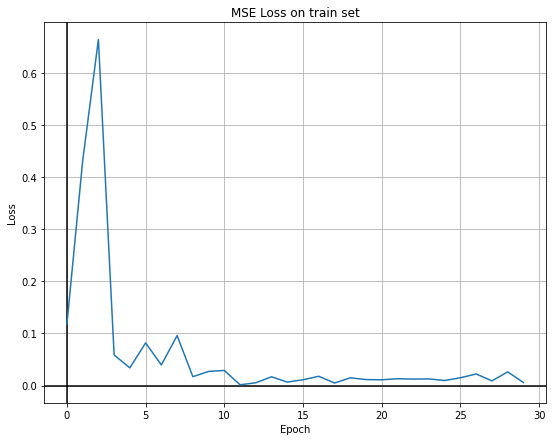

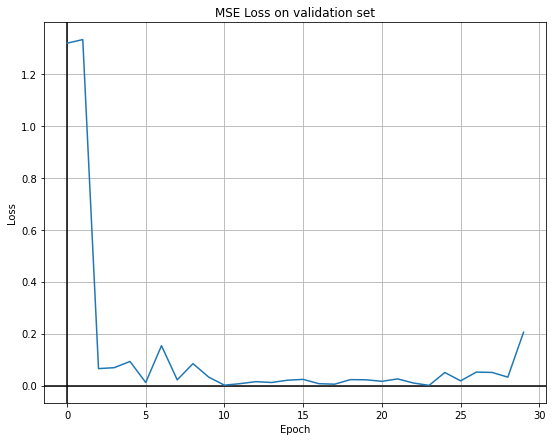

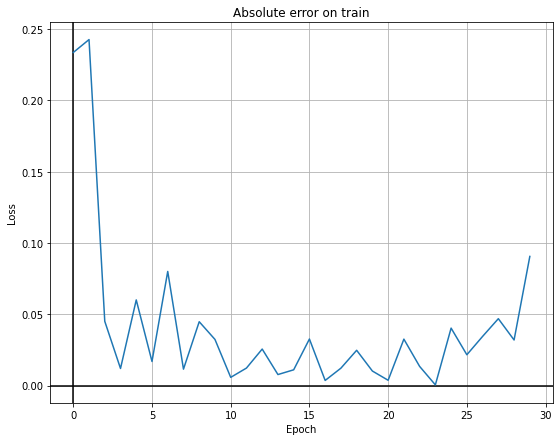

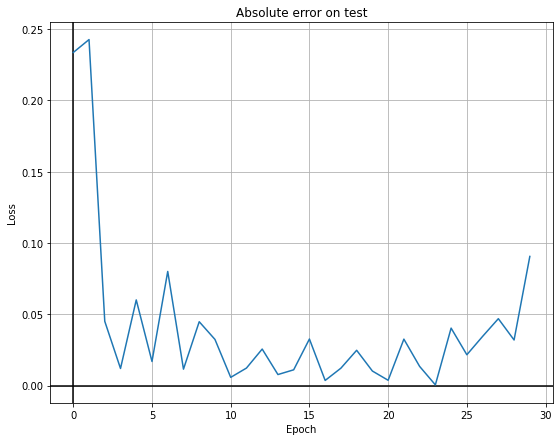

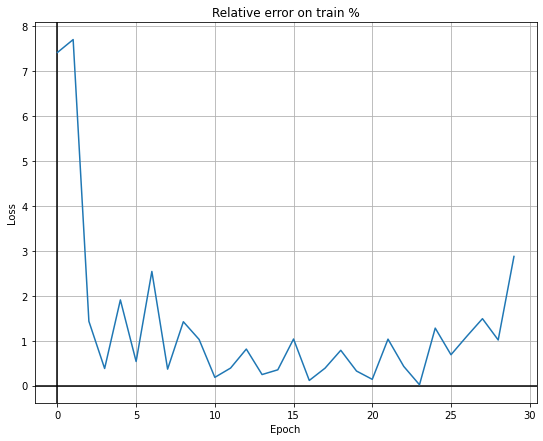

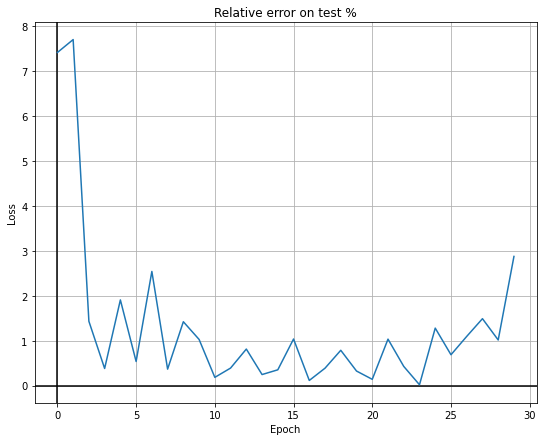

In [101]:
plot_results(epochs, mse_loss_train, mse_loss_valid, abs_err_train, abs_err_valid, relative_err_train, relative_err_valid)

Train absolute error: 0.09051108360290527
Train relative error: 2.8731818199157715 %
Valid absolute error: 0.09051108360290527
Valid relative error: 2.8731818199157715 %


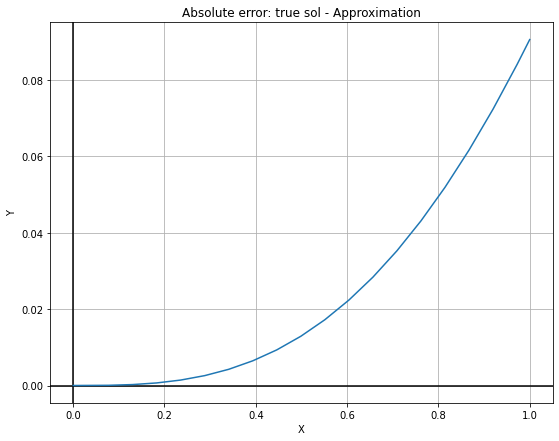

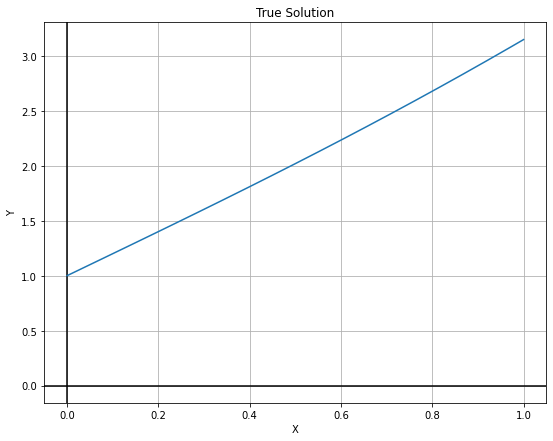

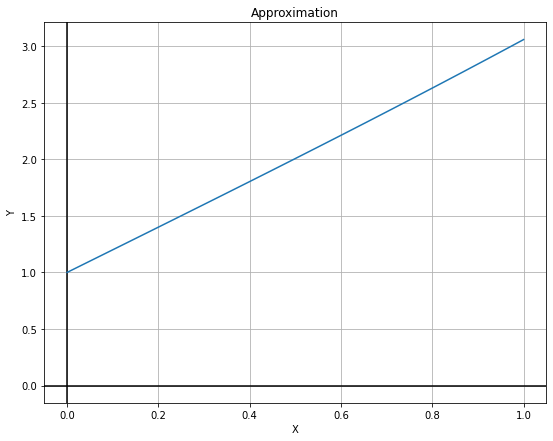

In [102]:
make_report(nn_model, approximation_of_function, train_domain, valid_domain,
            true_analytical_solution)